# Machine Learning project

<img src="newplot (7).png">

 [Clustering exploration that we tried in this project](#Clustering3)


<img src="newplot (6).png">

# Table of Contents
0. [Imports](#Imports)
1. [Exploration](#Exploration)
    1. [Reviewing the data](#Reviewing_the_data)
    2. [Exploration Functions](#Exploration_Functions)
    3. [Visualizing and analyzing the data](#Visualizing_and_analyzing_the_data)
    
2. [Preproccessing](#Preproccessing)
    1. [Basic Preproccessing Functions](#Basic_Preproccessing_Functions)
        1. [Basic Preproccessing for TargetIncoding](#Basic_Preproccessing_TargetIncoding)
        2. [Basic Preproccessing for HotIncoding](#Basic_Preproccessing_HotIncoding)
    2. [PCA Preproccessing Functions](#PCA_Preproccessing_Functions)
    3. [PCA preforming Functions](#PCA_Functions_Preforming)
        1. [PCA preforming for HotIncoding](#PCA_preforming_for_HotIncoding)
        2. [PCA preforming for TargetIncoding](#PCA_preforming_for_TargetIncoding)
4. [Clustering The Data](#Clustering)
    1. [Clustering the TargetIncoding](#Clustering1)
        1. [Looking for the size of cluster](#Clustering1.1)
        2. [Clustering the DF](#Clustering1.2)
    2. [Exploring the HotIncoding Dataframe(experimental Function](#Clustering2)
    3. [Clustering the HotIncoding](#Clustering3)
        1. [Looking for the size of cluster](#Clustering3.1)
        2. [Clustering the DF](#Clustering3.2) 

5. [OverSampling](#OverSampling)
6. [Basic Models](#BasicModels)
    1. [Logistic Regression](#Logistic_Regression)
        1. [Logistic Regression for TargetIncoding](#Logistic_Regression1)
        2. [Logistic Regression for HotIncoding](#Logistic_Regression2)
    2. [K nearest neighbor classification](#KNN)
        1. [KNN for TargetIncoding](#KNN1)
        2. [KNN for HotIncoding](#KNN2)
7. [Executing gridsearch](#gridsearch)
    1. [Random Forest](#GS_RF)
    2. [ANN - Artificial neural network](#GS_ANN)
    3. [logistic regession(Kfold)](#GS_LR) 
8. [Advanced Models (KFold)](#advancedModels)
    1. [Random Forest](#RF)
        1. [Random Forest for TargetIncoding](#RF1)
        2. [Random Forest for HotIncoding](#RF2)
    2. [ANN - Artificial neural network](#ANN)
        1. [ANN for TargetIncoding](#ANN1)
        2. [ANN for HotIncoding](#ANN2)
9. [Final Choice and creating CSV](#Final)
    1. [Random Forest](#Final1)




### Imports<a name="Imports" />

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats #To remove outliners via Standrat devietion
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import prince

import pandas as pd
from sklearn import preprocessing

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

#pca model  
from sklearn.decomposition import PCA

#All data clustering ( Experimental)
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import itertools 

# Might be to be deleted
from plotly.offline import iplot
import pandas as pd
import random
# /Might be to be deleted

### Basic Models
from sklearn.model_selection import train_test_split
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
from numpy import interp
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import pylab as pl
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\khen9\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Exploration<a name="Exploration" />

  1. [Reviewing the data](#Reviewing_the_data)
  2. [Exploration Functions](#Exploration_Functions)
  3. [Visualizing and analyzing the data](#Visualizing_and_analyzing_the_data)

#### Loading the data:

In [2]:
test_without_target = pd.read_csv('test_without_target.csv')
df = pd.read_csv('train.csv')

In [3]:
df_test1=pd.read_csv('train.csv')
df_test1.label.value_counts()

0    16921
1     5240
Name: label, dtype: int64

#### 1.A. Reviewing the data: <a name="Reviewing_the_data" />

In [4]:
df.head()

0          1    2     3      4  5    6         7         8   9  ...  \
0  1.170981   5.672133  0.6  80.0   76.0  D  a21  1.107143  0.692857   5  ...   
1  2.595788  23.203289  6.4  43.0   64.0  N   a9  1.700000  0.614286  11  ...   
2  0.972794   7.127348  0.4  63.0  100.0  C   a4  1.242857  0.428571   6  ...   
3  1.891667  17.881507  4.2  65.0   71.0  K  a15  1.050000  0.671429  10  ...   
4  1.965881  13.936969  3.2  40.0   62.0  F   a1  1.950000  1.085714   3  ...   

     16    17  18   19    20    21    22     23          24 label  
0  13.9  12.2   D    D  28.0   7.0  2011   40.0   15.420787     1  
1  18.6  16.5   N    I  61.0  43.0  2012  110.0  240.496883     0  
2  16.5   9.6   M  NaN  15.0   7.0  2012    0.0  224.282903     0  
3  14.2  11.4   K    D  39.0  24.0  2010  130.0   86.810830     0  
4  26.6  23.4   C  NaN  30.0  20.0  2011    0.0  120.642922     0  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22161 non-null  float64
 1   1       22161 non-null  float64
 2   2       22161 non-null  float64
 3   3       22102 non-null  float64
 4   4       22057 non-null  float64
 5   5       20812 non-null  object 
 6   6       22161 non-null  object 
 7   7       22154 non-null  float64
 8   8       22143 non-null  float64
 9   9       22161 non-null  int64  
 10  10      22161 non-null  float64
 11  11      22055 non-null  float64
 12  12      22048 non-null  float64
 13  13      22161 non-null  object 
 14  14      22161 non-null  object 
 15  15      20290 non-null  float64
 16  16      22133 non-null  float64
 17  17      22109 non-null  float64
 18  18      21951 non-null  object 
 19  19      21141 non-null  object 
 20  20      20816 non-null  float64
 21  21      22062 non-null  float64
 22

In [6]:
# percentile list 
perc =[.20, .40, .60, .80] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 
# calling describe method 
desc = df.describe(percentiles = perc, include = include) 
desc

0             1             2             3             4  \
count   22161.000000  22161.000000  22161.000000  22102.000000  22057.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.185958     19.797754      4.929620     51.547009     68.497982   
std         0.815080     10.763614      3.572644     20.184353     18.231315   
min        -0.490607      2.437300      0.000000      1.000000      3.000000   
20%         1.491545     11.108036      2.000000     34.000000     54.000000   
40%         1.957850     15.660977      3.600000     46.000000     65.000000   
50%         2.167701     17.833216      4.200000     52.000000     69.000000   
60%         2.378239     20.496002      5.200000     57.000000     74.000000   
80%         2.849972     27.015220      7.200000     69.000000     85.000000   
max         9.092011    248.877854     81.200000    100.000000    100.000000   

            5      6             7             8            10  ...     14  \
count   20812  22161  22154.000000  22143.000000  22161.000000  ...  22161   
unique     16     31           NaN           NaN           NaN  ...    315   
top         D     a6           NaN           NaN           NaN  ...  0.0mm   
freq     1604    786           NaN           NaN           NaN  ...  13816   
mean      NaN    NaN      1.648476      0.888041      0.228284  ...    NaN   
std       NaN    NaN      0.480275      0.461375      0.161565  ...    NaN   
min       NaN    NaN      0.450000     -0.492857     -0.195661  ...    NaN   
20%       NaN    NaN      1.200000      0.478571      0.118545  ...    NaN   
40%       NaN    NaN      1.471429      0.728571      0.180006  ...    NaN   
50%       NaN    NaN      1.607143      0.864286      0.206457  ...    NaN   
60%       NaN    NaN      1.764286      1.000000      0.233485  ...    NaN   
80%       NaN    NaN      2.100000      1.321429      0.299937  ...    NaN   
max       NaN    NaN      3.435714      2.128571      0.954076  ...    NaN   

                  15            16            17     18     19            20  \
count   20290.000000  22133.000000  22109.000000  21951  21141  20816.000000   
unique           NaN           NaN           NaN     16     16           NaN   
top              NaN           NaN           NaN      D      E           NaN   
freq             NaN           NaN           NaN   1659   1861           NaN   
mean       73.685017     21.617133     17.065837    NaN    NaN     39.995484   
std        37.866780      6.602743      6.409174    NaN    NaN     13.150807   
min         0.000000      3.900000     -0.700000    NaN    NaN     11.000000   
20%        36.000000     15.500000     11.100000    NaN    NaN     30.000000   
40%        69.000000     19.200000     14.800000    NaN    NaN     35.000000   
50%        82.000000     21.000000     16.600000    NaN    NaN     39.000000   
60%        92.000000     23.100000     18.500000    NaN    NaN     41.000000   
80%       108.000000     27.700000     23.100000    NaN    NaN     50.000000   
max       143.000000     46.100000     36.900000    NaN    NaN    135.000000   

                  21            23            24  
count   22062.000000  22061.000000  22061.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean       19.101577    146.971579    224.835441  
std         8.546933     86.609704    160.801099  
min         0.000000      0.000000      0.001355  
20%        11.000000     70.000000     80.305712  
40%        17.000000    110.000000    158.885664  
50%        19.000000    130.000000    199.866581  
60%        20.000000    170.000000    242.133677  
80%        26.000000    220.000000    347.846648  
max        69.000000 

#### Functions: <a name="Exploration_Functions" />

In [7]:
def ShowCorrelation(df):
    df_num = df.select_dtypes(include = ['float64', 'int64'])
    columnsNamesArr = df_num.columns.values
    columnsNamesArr=list(columnsNamesArr)
    for i in columnsNamesArr:
        df_num_corr = df_num.corr()[i][:-1] 
        golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
        golden_features_list=golden_features_list[1:] #removing the correltion of the column with itself
        print("There is {} strongly correlated values with {}:\n{}".format(len(golden_features_list),i ,golden_features_list))
        print("-----------------------------------------")

#plot histogrames and bars to describe the data #wht.Rbt.Return
def show_data(data):
    data_t= data

    names = data_t.columns.tolist()

    for i in names[:-1]:
        #remove rows without value
        data = data_t[i].dropna().sort_values(ascending  = True).to_frame()
        #describe data with objects
        if data[i].dtypes == object:

            data = data[data[i] != "unknown"  ]
            data = data[data[i]  != "?"]
            data[i].value_counts().plot(kind='bar') 
        #describe data with numeric
        
        else:

            data= data.reset_index(drop=True)
            data = data[i].tolist()
            #print boxplot of the data
            print('box plot of col %s' %i)
            plt.boxplot(data)
            plt.show()
            #print hist of the data
            plt.figure(figsize=(8,6))
            plt.hist(data, bins=100, alpha=0.5)
            
        
        
        plt.title('the Frequency of values  of the col %s'%i)
        plt.xlabel('the values')
        plt.ylabel('frequency')
        plt.show()
        
#plot Correltion graph with spesific numeric column
def Plot_Correlation_With_Column(df, Coll_Name):
    df_num = df.select_dtypes(include = ['float64', 'int64'])
    for i in range(0, len(df_num.columns), 5):
        sns.pairplot(data=df_num,
                    x_vars=df_num.columns[i:i+5],
                    y_vars=[Coll_Name])


def Plot_Correlation_HeatMap(df):
    data = df
    plt.subplots(figsize=(20,15))
    corr = data.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

### Visualizing and analyzing the data: <a name="Visualizing_and_analyzing_the_data" />

#### Showing the Strongest correletion between those columns

In [8]:
ShowCorrelation(df)

There is 7 strongly correlated values with 0:
2     0.887217
1     0.883506
7     0.625972
16    0.607973
17    0.593395
8     0.504118
4    -0.502322
Name: 0, dtype: float64
-----------------------------------------
There is 6 strongly correlated values with 1:
2     0.995700
0     0.883506
7     0.621200
16    0.602851
17    0.577735
4    -0.502023
Name: 1, dtype: float64
-----------------------------------------
There is 6 strongly correlated values with 2:
1     0.995700
0     0.887217
7     0.623521
16    0.605185
17    0.579922
4    -0.504139
Name: 2, dtype: float64
-----------------------------------------
There is 2 strongly correlated values with 3:
4     0.660501
15   -0.628820
Name: 3, dtype: float64
-----------------------------------------
There is 4 strongly correlated values with 4:
3    0.660501
1   -0.502023
0   -0.502322
2   -0.504139
Name: 4, dtype: float64
-----------------------------------------
There is 6 strongly correlated values with 7:
16    0.983479
17    0.

box plot of col 0


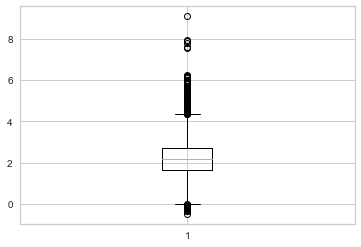

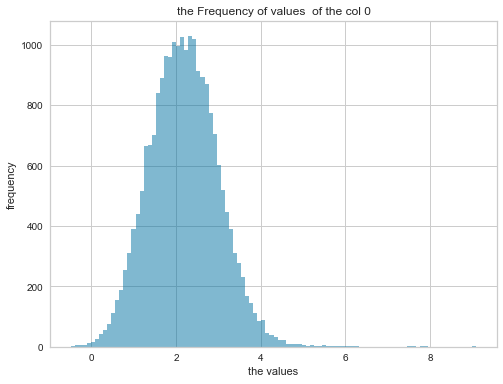

box plot of col 1


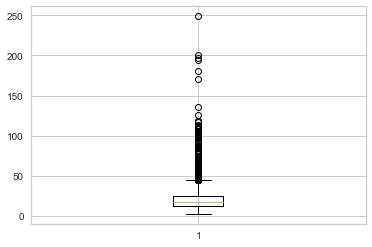

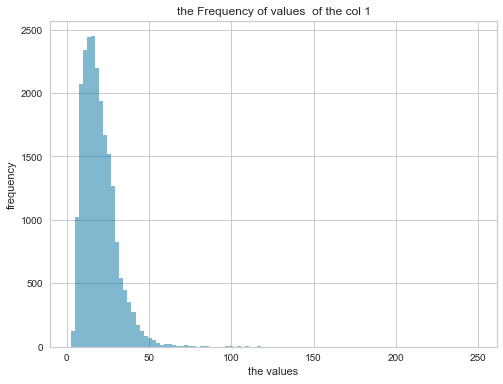

box plot of col 2


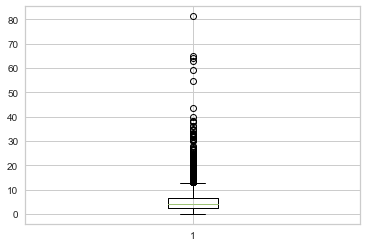

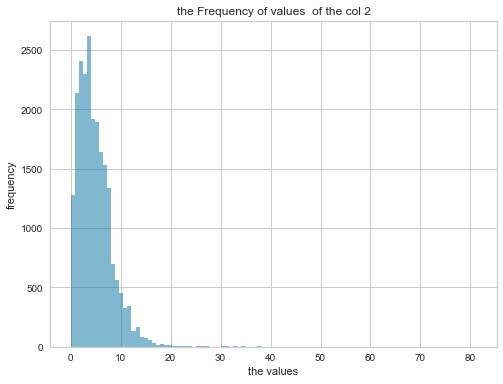

box plot of col 3


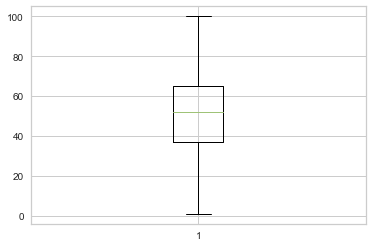

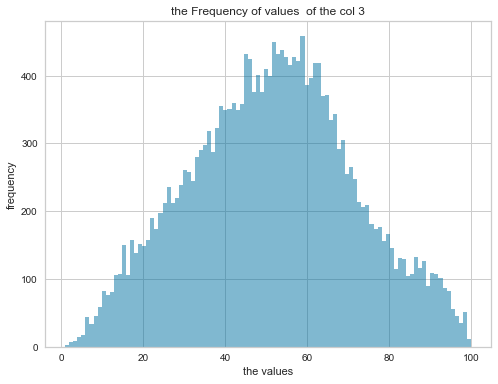

box plot of col 4


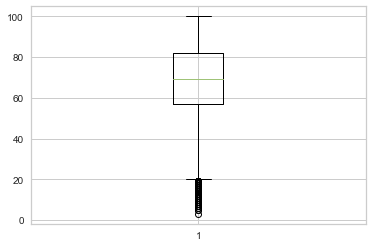

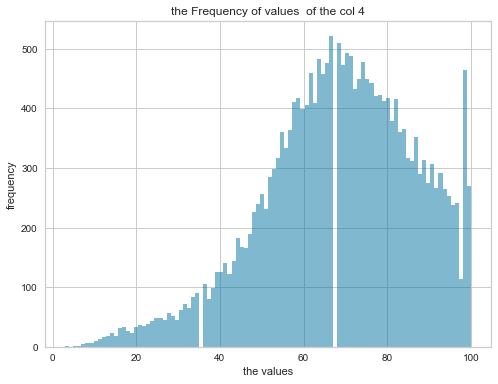

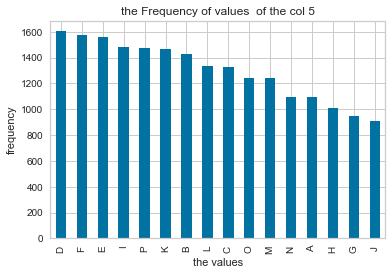

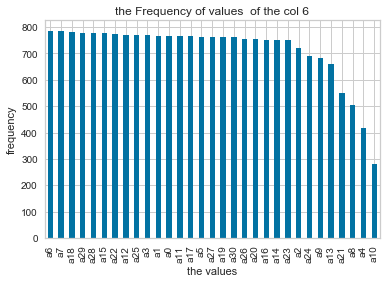

box plot of col 7


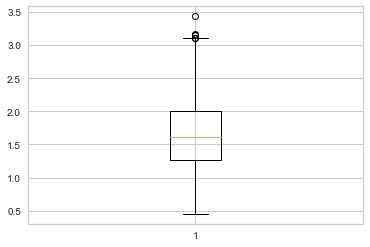

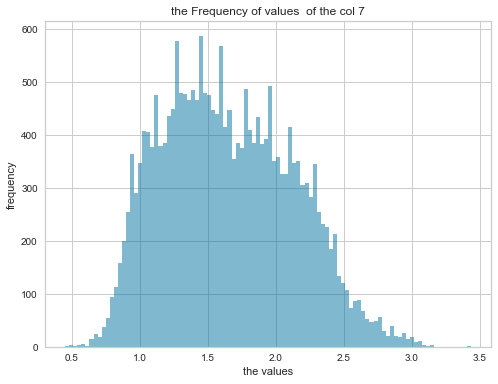

box plot of col 8


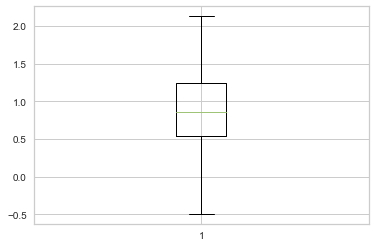

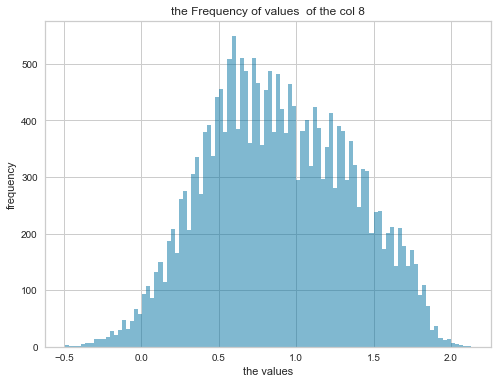

box plot of col 9


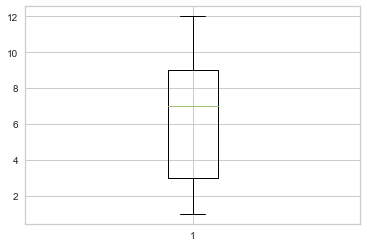

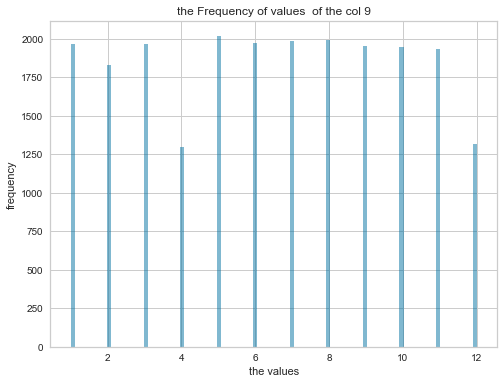

box plot of col 10


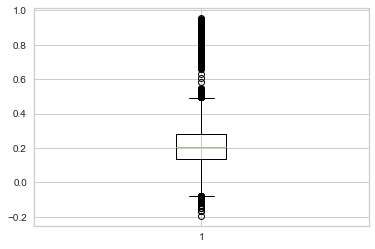

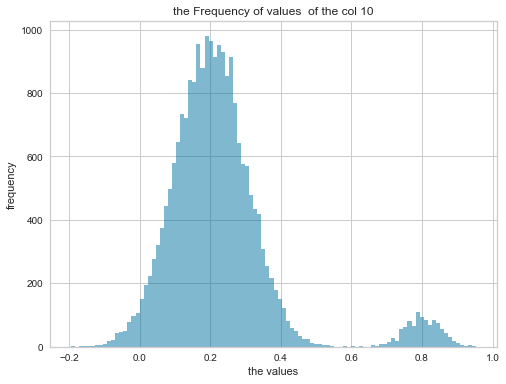

box plot of col 11


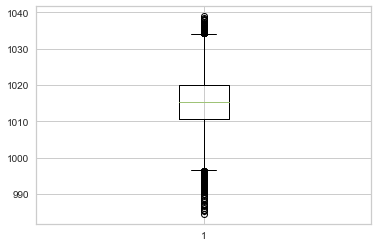

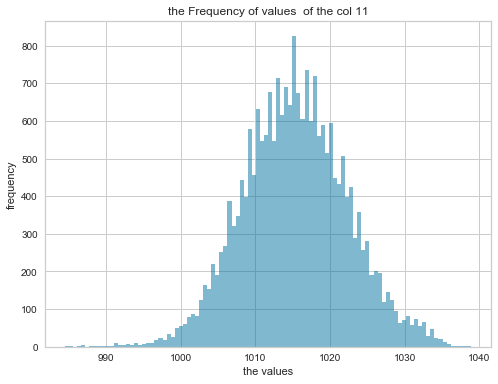

box plot of col 12


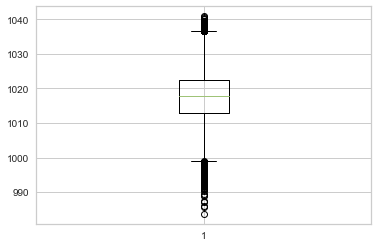

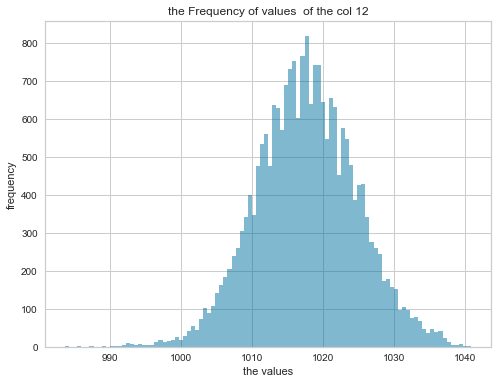

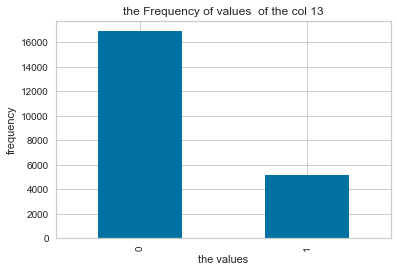

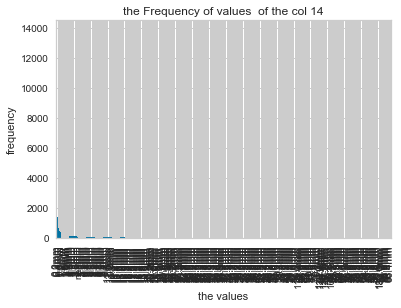

box plot of col 15


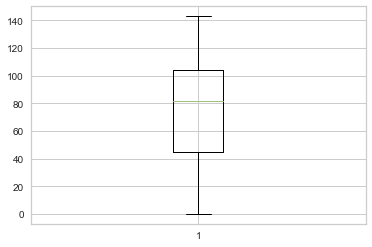

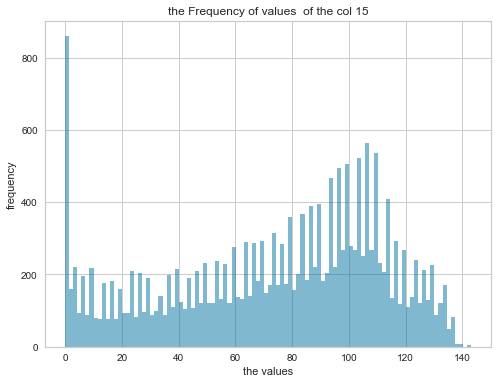

box plot of col 16


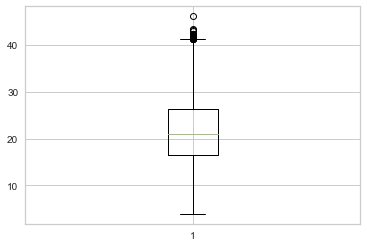

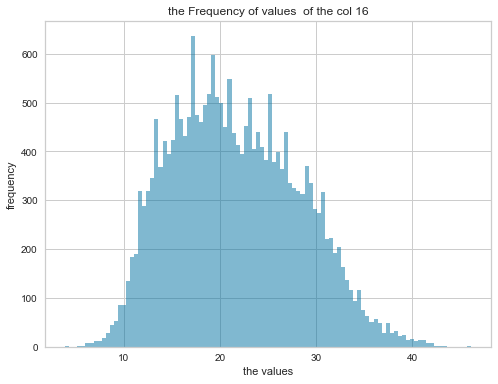

box plot of col 17


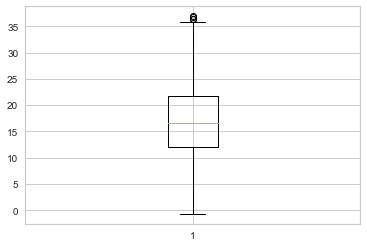

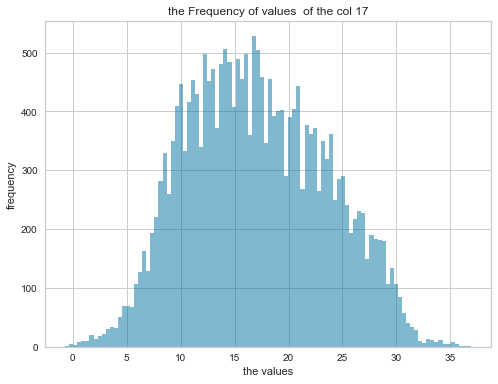

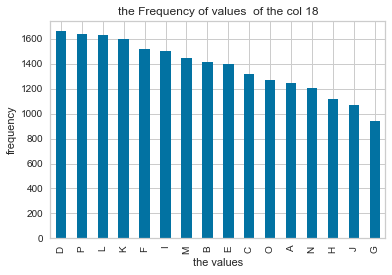

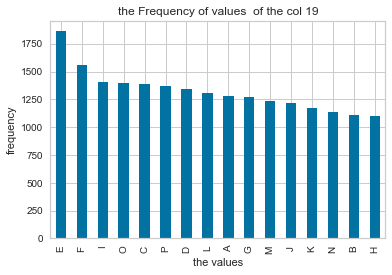

box plot of col 20


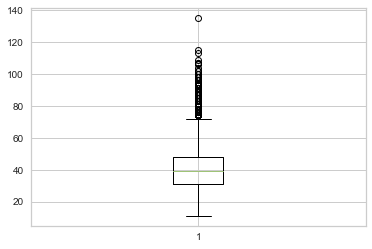

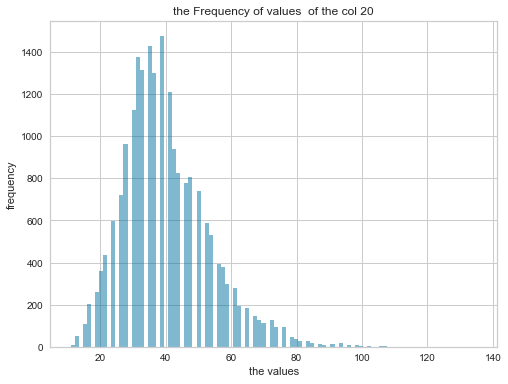

box plot of col 21


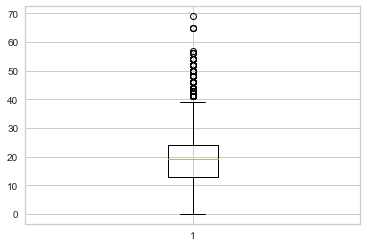

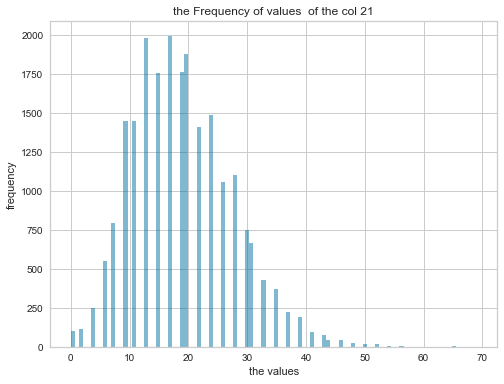

box plot of col 22


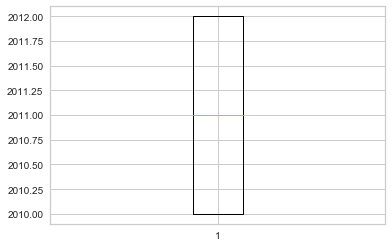

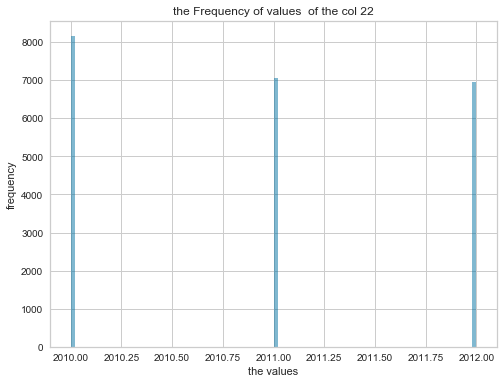

box plot of col 23


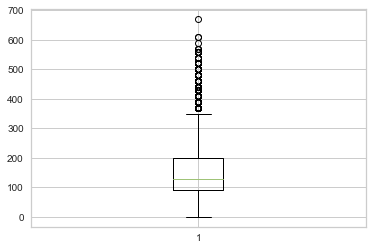

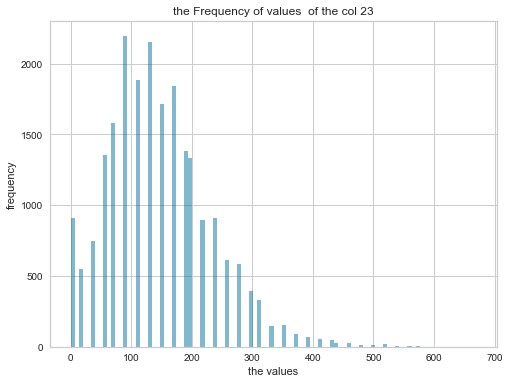

box plot of col 24


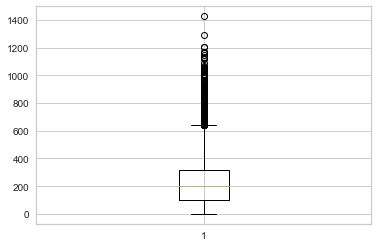

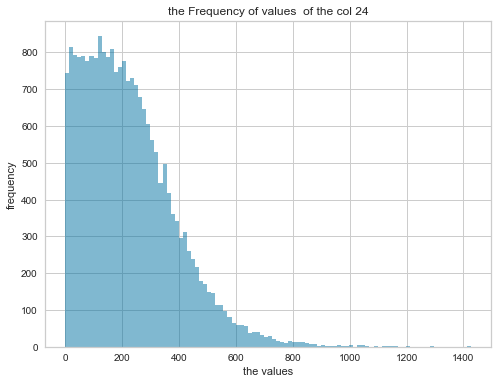

In [9]:
show_data(df)

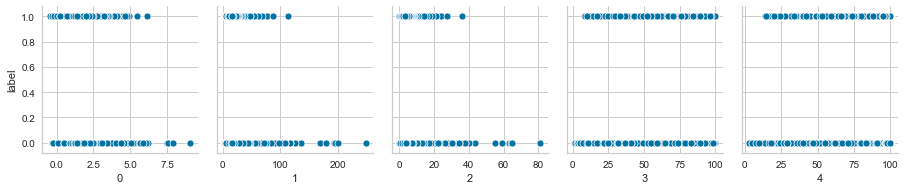

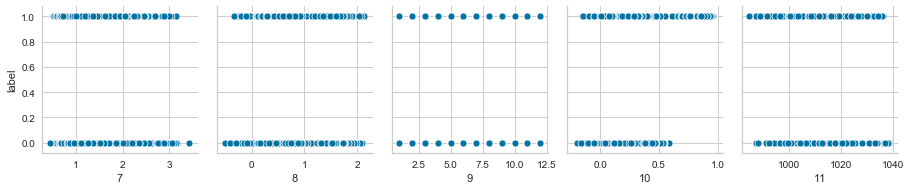

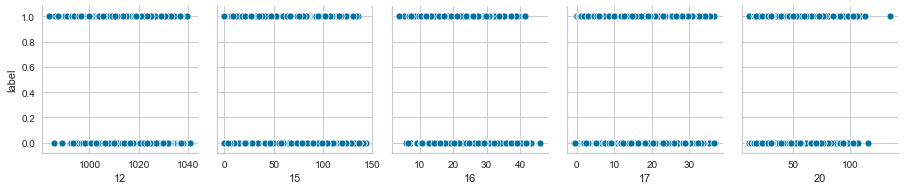

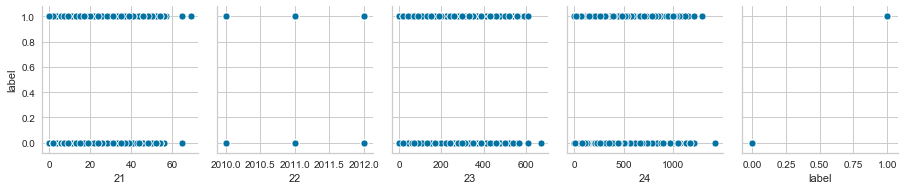

In [10]:
Plot_Correlation_With_Column(df, 'label')

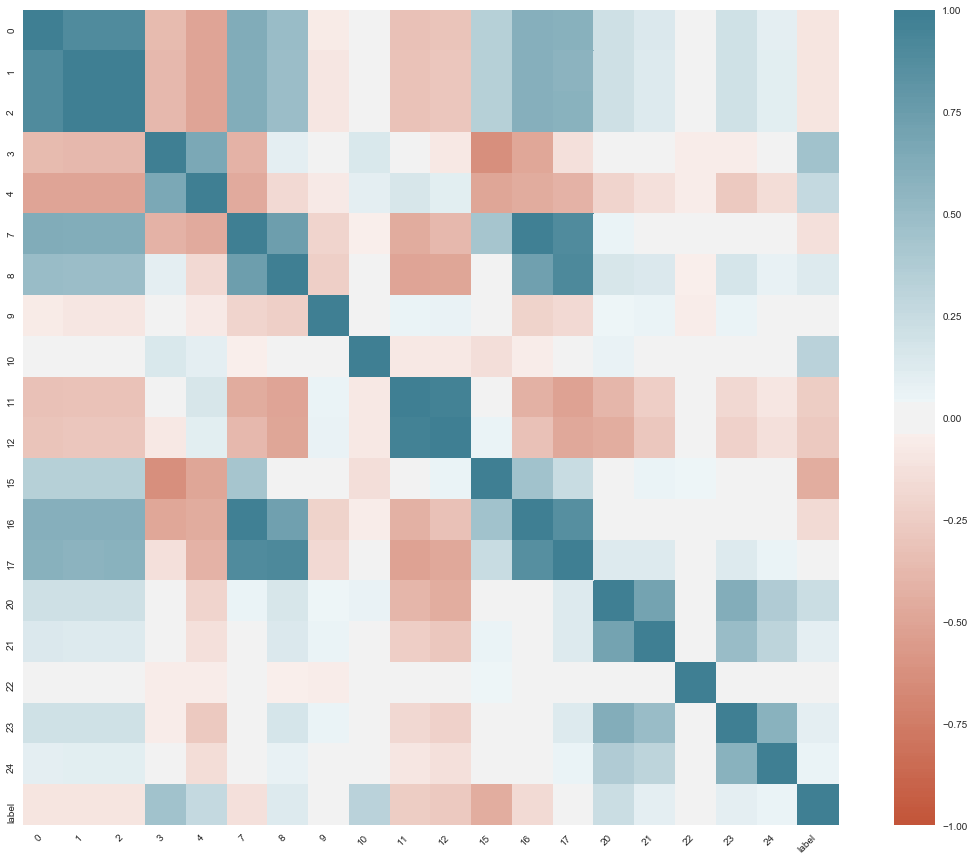

In [11]:
Plot_Correlation_HeatMap(df)

# Preproccessing <a name="Preproccessing" />
   1. [Basic Preproccessing Functions](#Basic_Preproccessing_Functions)
        1. [Basic Preproccessing for TargetIncoding](#Basic_Preproccessing_TargetIncoding)
        2. [Basic Preproccessing for HotIncoding](#Basic_Preproccessing_HotIncoding)
   2. [PCA Preproccessing Functions](#PCA_Preproccessing_Functions)
   3. [PCA preforming Functions](#PCA_Functions_Preforming)
        1. [PCA preforming for HotIncoding](#PCA_preforming_for_HotIncoding)
        2. [PCA preforming for TargetIncoding](#PCA_preforming_for_TargetIncoding)

## Function for basic Preproccessing <a name="Basic_Preproccessing_Functions" />

In [12]:
def preProccessingDataset(df,columRemove=[['2', '16','17','11','1'],['2', '16','17','11','1','Unnamed: 0']],HotIncodingTest=False,HotIncoding=True,TestDF=None):
    
    if(HotIncoding== True):
        df = replaceNanWithMeansNumeric(df)
        if(HotIncodingTest==False):
            df = df_Z_score_Outliner_remover(df)
        print("df shape after outliners"+str(df.shape))
        df = RemoveStrongCorraltedColumns(df,columRemove[0])
        df=HotIncoding_for_DF(df)
        df = fix_Col_14(df)
        return df
    else:
        df = replaceNanWithMeansNumeric(df)
        df = df_Z_score_Outliner_remover(df)
        df = RemoveStrongCorraltedColumns(df,columRemove[0])
        
        TestDF = replaceNanWithMeansNumeric(TestDF)
        #print("Wht.Rbt")
        #print(TestDF.shape)
        #print("Wht.Rbt")
        #TestDF = df_Z_score_Outliner_remover(TestDF) Wht.Rbt_פה
        TestDF = RemoveStrongCorraltedColumns(TestDF,columRemove[1])
        df,test_without_target = TargetIncoding_for_DF(df,TestDF)
        
        df = FillNullTargetCategorial(df)
        test_without_target = FillNullTargetCategorial(test_without_target)
        
        df = fix_Col_14(df)
        #df=Random_under_sampling(df)
        test_without_target = fix_Col_14(test_without_target)
        return df,test_without_target
    
def Random_under_sampling(X,y):
    # define oversampling strategy
    over = RandomOverSampler(sampling_strategy='auto')
    # fit and apply the transform
    X, y = over.fit_resample(X, y)
    # define undersampling strategy
    under = RandomUnderSampler(sampling_strategy='auto')
    # fit and apply the transform
    X, y = under.fit_resample(X, y)
    #df_test_under = pd.DataFrame(X)
    #df_test_under['label']=pd.Series(y)
    return X, y
def Random_under_sampling2(df):
    count_class_0, count_class_1 = df.label.value_counts()
    # Divide by class
    df_class_0 = df[df['label'] == 0]
    df_class_1 = df[df['label'] == 1]
    df_class_0_under = df_class_0.sample(count_class_1)
    df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
    return df_test_under
def Random_over_sampling(df):
    count_class_0, count_class_1 = df.label.value_counts()
    # Divide by class
    df_class_0 = df[df['label'] == 0]
    df_class_1 = df[df['label'] == 1]
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
    return df_test_over

def RemoveStrongCorraltedColumns(df,columRemove):
    df=df.drop(columns=columRemove)
    return df

def NullReview(df):
    print(df.isnull().sum())
    
def df_Z_score_Outliner_remover(df,Z=3):
    numeric_columns = df.select_dtypes(include=['number']).columns
    df=df[(np.abs(stats.zscore(df[numeric_columns])) < Z).all(axis=1)]
    return df

def df_quantile_Outliner_remover(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    for i in numeric_columns:
        df=remove_outlier(df, i)
    return df

def remove_outlier(df, col):
    q1 = df[col].quantile(0.01)
    q3 = df[col].quantile(0.99)

    iqr = q3 - q1
    lower_bound  = q1 - (1.5  * iqr)
    upper_bound = q3 + (1.5 * iqr)
    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

def replaceNanWithMeansNumeric(df):
    # select numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    # fill -1 to all mean 
    df[numeric_columns] = df[numeric_columns].fillna(df.mean())
    return df

def OutlinersVisuelsied(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    print(numeric_columns)
    for i in numeric_columns:
        sns_Show(df,i)
def sns_Show(df,i):
    plt.figure()
    sns.distplot(df[i], rug=True)
    
def HotIncoding_for_DF(df,columns=['5','6','18','19','13','22']): #['5','6','18','19','13']
    df_HotDec=df.copy()
    df_HotDec['22'] = df_HotDec['22'].astype(str)
    temp_HotDec = pd.get_dummies(df_HotDec[['5','6','18','19','13','22']])
    print("Wht.Rbt6")
    print(temp_HotDec)
    df_HotDec = df_HotDec.join(temp_HotDec)
    df_HotDec = df_HotDec.drop(['5','6','18','19','13','22'],axis = 1)
    return df_HotDec

def TargetIncoding_for_DF(df,test_without_target,columns=['5','6','18','19','13','22']): #['5','6','18','19','13']
    for i in columns:
        df[i],test_without_target[i]=calc_smooth_mean(df,test_without_target, by=i, on='label', m=10)
    return df,test_without_target
    
#https://maxhalford.github.io/blog/target-encoding/
def calc_smooth_mean(df,endDF_test, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    #Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)
    #print(smooth)
    # Replace each value by the according smoothed mean
    return df[by].map(smooth),endDF_test[by].map(smooth)

def FillNullTargetCategorial(df,columns=['5','6','18','19','13','22']):
    df[columns] = df[columns].fillna(df.mean())
    return df

def fix_Col_14(df2): #removed the "mm" fro mthe number 
    df2['14'] = df2['14'].str.replace(r'[a-z]+', '')
    df2['14'] = pd.to_numeric(df2['14'], errors='coerce')
    
    Temp=df2['14'][df2['14'].isnull()==False].astype(float)
    df2['14'][df2['14'].isnull()==True]=Temp.mean()
    df2['14'].astype(float)
    return df2

### preprocessing Target Incoding<a name="Basic_Preproccessing_TargetIncoding" /> 

In [13]:
df_target,TargetIncoding_test_without_target = preProccessingDataset(df.copy(),HotIncoding=False,TestDF=test_without_target)

In [14]:
df_target

0     3      4         5         6         7         8   9  \
0      1.170981  80.0   76.0  0.188382  0.202332  1.107143  0.692857   5   
1      2.595788  43.0   64.0  0.265653  0.158796  1.700000  0.614286  11   
2      0.972794  63.0  100.0  0.149814  0.194910  1.242857  0.428571   6   
3      1.891667  65.0   71.0  0.219232  0.316989  1.050000  0.671429  10   
4      1.965881  40.0   62.0  0.148725  0.266247  1.950000  1.085714   3   
...         ...   ...    ...       ...       ...       ...       ...  ..   
22156  1.408356  55.0   83.0  0.219232  0.157918  1.364286  0.685714   4   
22157  2.259704  37.0   71.0  0.240536  0.216204  1.507143  0.742857   5   
22158  2.179382  96.0   95.0  0.214891  0.123257  0.957143  0.821429   7   
22159  2.014433  89.0   95.0  0.265653  0.281287  1.000000  0.700000   5   
22160  1.823822  59.0   62.0  0.194836  0.234991  1.257143  0.885714   9   

             10      12  ...    14          15        18        19         20  \
0      0.702957  1025.9  ...   0.6   32.000000  0.169137  0.195364  28.000000   
1      0.223911  1008.1  ...   0.0   50.000000  0.250889  0.215368  61.000000   
2      0.180848  1026.5  ...   0.0   73.685017  0.138435  0.199304  15.000000   
3      0.181289  1019.8  ...   0.8   88.000000  0.211474  0.195364  39.000000   
4      0.237347  1007.8  ...   0.0  112.000000  0.173156  0.199304  30.000000   
...         ...     ...  ...   ...         ...       ...       ...        ...   
22156  0.119284  1022.0  ...   1.8   99.000000  0.169137  0.215368  31.000000   
22157  0.248723  1023.1  ...   0.0   90.000000  0.250889  0.215368  30.000000   
22158  0.076460  1018.7  ...  10.8   73.685017  0.262696  0.247364  46.000000   
22159  0.284438  1010.5  ...   2.6   27.000000  0.251783  0.277346  50.000000   
22160  0.265140  1037.1  ...   0.0   57.000000  0.173156  0.200807  39.995484   

         21        22     23          24  label  
0       7.0  0.204193   40.0   15.420787      1  
1      43.0  0.180635  110.0  240.496883      0  
2       7.0  0.180635    0.0  224.282903      0  
3      24.0  0.202921  130.0   86.810830      0  
4      20.0  0.204193    0.0  120.642922      0  
...     ...       ...    ...         ...    ...  
22156  15.0  0.202921   90.0  115.748582      0  
22157   9.0  0.180635  240.0  259.280483      0  
22158  15.0  0.180635  260.0  392.348764      1  
22159  17.0  0.202921  150.0  259.886217      1  
22160  19.0  0.202921   70.0   83.368091      0  

[20302 rows x 21 columns]

In [15]:
TargetIncoding_test_without_target

0     3     4         5         6         7         8   9  \
0     1.534361  67.0  97.0  0.148725  0.182945  1.600000  0.650000   3   
1     1.632953  72.0  78.0  0.158310  0.201024  1.942857  1.328571   4   
2     2.330694  64.0  53.0  0.185640  0.174338  1.864286  0.992857   8   
3     2.560304  20.0  71.0  0.265653  0.201024  2.457143  1.257143  11   
4     1.391859  44.0  42.0  0.148725  0.284468  1.285714  0.892857   9   
...        ...   ...   ...       ...       ...       ...       ...  ..   
7382  2.177893  58.0  69.0  0.185640  0.201024  2.078571  1.314286   3   
7383  0.273111  98.0  99.0  0.188382  0.223428  0.842857  0.478571   6   
7384  3.824255  18.0  39.0  0.158808  0.093038  2.714286  1.535714   4   
7385  2.647914  29.0  52.0  0.148725  0.123257  2.114286  0.942857  10   
7386 -0.179808  37.0  70.0  0.240536  0.077257  1.442857  0.478571   6   

            10      12        13    14         15        18        19    20  \
0     0.212177  1026.2  0.133450   0.2  105.00000  0.175010  0.238204  52.0   
1     0.126069  1016.3  0.133450   0.2   34.00000  0.173722  0.195364  24.0   
2     0.263743  1020.7  0.133450   0.0  102.00000  0.173156  0.176710  39.0   
3     0.182740  1011.4  0.410441  16.6  124.00000  0.250889  0.215368  35.0   
4     0.241681  1023.5  0.133450   0.0   84.00000  0.138435  0.146332  43.0   
...        ...     ...       ...   ...        ...       ...       ...   ...   
7382  0.130904  1021.1  0.133450   0.0  109.00000  0.173156  0.195364  24.0   
7383  0.252221  1028.3  0.133450   1.0   16.00000  0.169137  0.200807  17.0   
7384  0.245992  1017.1  0.133450   0.0   84.00000  0.191762  0.130906  30.0   
7385  0.136663  1017.4  0.133450   0.0   73.14142  0.173722  0.158751  44.0   
7386  0.313665  1019.7  0.133450   0.0   42.00000  0.250889  0.277346  44.0   

        21        22     23          24  
0     33.0  0.180635   70.0  354.720533  
1     11.0  0.180635   40.0  120.529466  
2     31.0  0.204193   70.0  294.533370  
3     13.0  0.180635   60.0   57.037532  
4     20.0  0.180635  200.0  178.457573  
...    ...       ...    ...         ...  
7382  11.0  0.202921   60.0  160.850961  
7383   7.0  0.180635   60.0   96.557219  
7384   7.0  0.180635   60.0  129.800044  
7385   9.0  0.204193  190.0  257.275504  
7386  22.0  0.204193   70.0  281.967852  

[7387 rows x 20 columns]

### preprocessing Hot Incoding <a name="Basic_Preproccessing_HotIncoding" /> 

In [16]:
df_Hot_incoding = preProccessingDataset(df)
#df_Hot_incoding=Random_under_sampling(df_Hot_incoding)
HotIncoding_test_without_target = preProccessingDataset(test_without_target,[['2', '16','17','11','1','Unnamed: 0']],HotIncodingTest=True)

df shape after outliners(20302, 26)
Wht.Rbt6
       5_A  5_B  5_C  5_D  5_E  5_F  5_G  5_H  5_I  5_J  ...  19_M  19_N  \
0        0    0    0    1    0    0    0    0    0    0  ...     0     0   
1        0    0    0    0    0    0    0    0    0    0  ...     0     0   
2        0    0    1    0    0    0    0    0    0    0  ...     0     0   
3        0    0    0    0    0    0    0    0    0    0  ...     0     0   
4        0    0    0    0    0    1    0    0    0    0  ...     0     0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
22156    0    0    0    0    0    0    0    0    0    0  ...     0     0   
22157    0    0    0    0    0    0    0    0    1    0  ...     0     0   
22158    0    0    0    0    0    0    1    0    0    0  ...     0     0   
22159    0    0    0    0    0    0    0    0    0    0  ...     0     0   
22160    0    0    0    0    0    0    0    0    0    0  ...     0     0   

       19_O  19_P  13_0  13_1  13_unknown 

In [17]:
df_Hot_incoding

0     3      4         7         8   9        10      12    14  \
0      1.170981  80.0   76.0  1.107143  0.692857   5  0.702957  1025.9   0.6   
1      2.595788  43.0   64.0  1.700000  0.614286  11  0.223911  1008.1   0.0   
2      0.972794  63.0  100.0  1.242857  0.428571   6  0.180848  1026.5   0.0   
3      1.891667  65.0   71.0  1.050000  0.671429  10  0.181289  1019.8   0.8   
4      1.965881  40.0   62.0  1.950000  1.085714   3  0.237347  1007.8   0.0   
...         ...   ...    ...       ...       ...  ..       ...     ...   ...   
22156  1.408356  55.0   83.0  1.364286  0.685714   4  0.119284  1022.0   1.8   
22157  2.259704  37.0   71.0  1.507143  0.742857   5  0.248723  1023.1   0.0   
22158  2.179382  96.0   95.0  0.957143  0.821429   7  0.076460  1018.7  10.8   
22159  2.014433  89.0   95.0  1.000000  0.700000   5  0.284438  1010.5   2.6   
22160  1.823822  59.0   62.0  1.257143  0.885714   9  0.265140  1037.1   0.0   

               15  ...  19_M  19_N  19_O  19_P  13_0  13_1  13_unknown  \
0       32.000000  ...     0     0     0     0     1     0           0   
1       50.000000  ...     0     0     0     0     1     0           0   
2       73.685017  ...     0     0     0     0     1     0           0   
3       88.000000  ...     0     0     0     0     1     0           0   
4      112.000000  ...     0     0     0     0     1     0           0   
...           ...  ...   ...   ...   ...   ...   ...   ...         ...   
22156   99.000000  ...     0     0     0     0     0     1           0   
22157   90.000000  ...     0     0     0     0     1     0           0   
22158   73.685017  ...     0     0     0     0     0     1           0   
22159   27.000000  ...     0     0     0     0     0     1           0   
22160   57.000000  ...     0     0     0     0     1     0           0   

       22_2010  22_2011  22_2012  
0            0        1        0  
1            0        0        1  
2            0        0        1  
3            1        0        0  
4            0        1        0  
...        ...      ...      ...  
22156        1        0        0  
22157        0        0        1  
22158        0        0        1  
22159        1        0        0  
22160        1        0        0  

[20302 rows x 100 columns]

In [18]:
HotIncoding_test_without_target.columns

Index(['0', '3', '4', '7', '8', '9', '10', '12', '14', '15', '20', '21', '23',
       '24', '5_A', '5_B', '5_C', '5_D', '5_E', '5_F', '5_G', '5_H', '5_I',
       '5_J', '5_K', '5_L', '5_M', '5_N', '5_O', '5_P', '6_a0', '6_a1',
       '6_a10', '6_a11', '6_a12', '6_a13', '6_a14', '6_a15', '6_a16', '6_a17',
       '6_a18', '6_a19', '6_a2', '6_a20', '6_a21', '6_a22', '6_a23', '6_a24',
       '6_a25', '6_a26', '6_a27', '6_a28', '6_a29', '6_a3', '6_a30', '6_a4',
       '6_a5', '6_a6', '6_a7', '6_a8', '6_a9', '18_A', '18_B', '18_C', '18_D',
       '18_E', '18_F', '18_G', '18_H', '18_I', '18_J', '18_K', '18_L', '18_M',
       '18_N', '18_O', '18_P', '19_A', '19_B', '19_C', '19_D', '19_E', '19_F',
       '19_G', '19_H', '19_I', '19_J', '19_K', '19_L', '19_M', '19_N', '19_O',
       '19_P', '13_0', '13_1', '13_unknown', '22_2010', '22_2011', '22_2012'],
      dtype='object')

## Keeping The Train Result

In [19]:
TrainTrue_label=df_Hot_incoding['label'].copy()
TrainTrue_labe_df_target =df_target['label'].copy()

## Function for PCA -  Preproccessing <a name="PCA_Preproccessing_Functions" />

In [20]:
def Normelizing_DF_for_Target_incoding(df,Label=True):
    if(Label):
        Train_Result=df['label'].values[:] #removing the label to avoid normalising the label
        df=df.drop(['label'], axis=1)

    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df,x_scaled

def Seperating_Hot_Decoding_dataFrame(df):
    X = df.copy()
    Binary_df_HotDec_Columns=[]
    RegX_df_HotDec_Columns=[]
    Flag=False
    counter=0
    for i in list(X.columns):
        counter+=1
        if Flag==True and i != 'label': #פה
            Binary_df_HotDec_Columns.append(i)
        elif Flag == False and i != 'label':
            RegX_df_HotDec_Columns.append(i)
        if i == 'label' or counter==15:
            Flag=True
    Binary_df_HotDec_Columns=X[Binary_df_HotDec_Columns]
    RegX_df_HotDec_Columns=X[RegX_df_HotDec_Columns]
    return RegX_df_HotDec_Columns,Binary_df_HotDec_Columns

def Normelizing_dataFrame(df,HotIncoding=True,IfLabelAtDf=True):
    if (HotIncoding== True):
        RegularColumns_df_HotDec_Columns,Binary_df_HotDec_Columns=Seperating_Hot_Decoding_dataFrame(df)
        
        RegularColumns_df_HotDec_Columns = NormelizingDfSub(RegularColumns_df_HotDec_Columns)
        #Binary_df_HotDec_Columns = NormelizingDfSub(Binary_df_HotDec_Columns)
        return RegularColumns_df_HotDec_Columns,Binary_df_HotDec_Columns
    else:
        Target_incodingNormelized = Normelizing_DF_for_Target_incoding(df,IfLabelAtDf)
        return Target_incodingNormelized[0]

def NormelizingDfSub(df):
        x = df.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled2 = min_max_scaler.fit_transform(df)
        df = pd.DataFrame(x_scaled2)
        return df
        

## Function for PCA -  Preforming <a name="PCA_Functions_Preforming" />

In [21]:
def pca_fun(n,X):
    pca = PCA(n)
    # Fit the model with the data
    pca.fit(X)
    # apply the PCA on the data (or on new data)
    X_pca = pca.transform(X)
    
    # Percentage of variance explained by each of the
    #selected components 
    pca.explained_variance_ratio_
    # See the components
    pca.components_
    
    print("original shape:   ", X.shape)
    print("transformed shape:", X_pca.shape)
    return X_pca
    
def show_v_ratio(n,X):  
    pca = PCA(n)
    
    pca.fit(X)
    plt.figure(figsize=(10,10))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

def preforming_PCA(df,binaryPart=None,HotIncoding=True,IfLabelAtDf=True):
    if ( HotIncoding ==True ):
        RegularColumns_df_HotDec_Columns,Binary_df_HotDec_Columns=Normelizing_dataFrame(df,HotIncoding=True)
        print("components effect for minmax normalization for Regular part of DF")
        show_v_ratio(len(RegularColumns_df_HotDec_Columns.columns),RegularColumns_df_HotDec_Columns)
        print("components effect for minmax normalization for Binary part of DF")
        show_v_ratio(len(Binary_df_HotDec_Columns.columns),Binary_df_HotDec_Columns)
        
        Binary_df_HotDec_ColumnsPCA_Matric = pca_fun(75,Binary_df_HotDec_Columns)
        RegX_df_HotDec_ColumnsPCA_Matric = pca_fun(13,RegularColumns_df_HotDec_Columns)
        
        PCA_componentsA=pd.DataFrame(RegX_df_HotDec_ColumnsPCA_Matric)
        PCA_componentsB=pd.DataFrame(Binary_df_HotDec_ColumnsPCA_Matric)
        print(PCA_componentsA.shape)
        print(PCA_componentsB.shape)
        PCA_componentsHotIcoding =pd.DataFrame(pd.concat([PCA_componentsA,PCA_componentsB], axis=1).values)
        return PCA_componentsHotIcoding
    else:
        TargetIcodingNOrmelized=Normelizing_dataFrame(df,False,IfLabelAtDf)
        print("hi")
        show_v_ratio(len(TargetIcodingNOrmelized.columns),TargetIcodingNOrmelized)
        PCA_componentsTargetIcoding = pca_fun(17,TargetIcodingNOrmelized)
        return pd.DataFrame(PCA_componentsTargetIcoding)

### PCA preforming for HotIncoding <a name="PCA_preforming_for_HotIncoding" />

components effect for minmax normalization for Regular part of DF


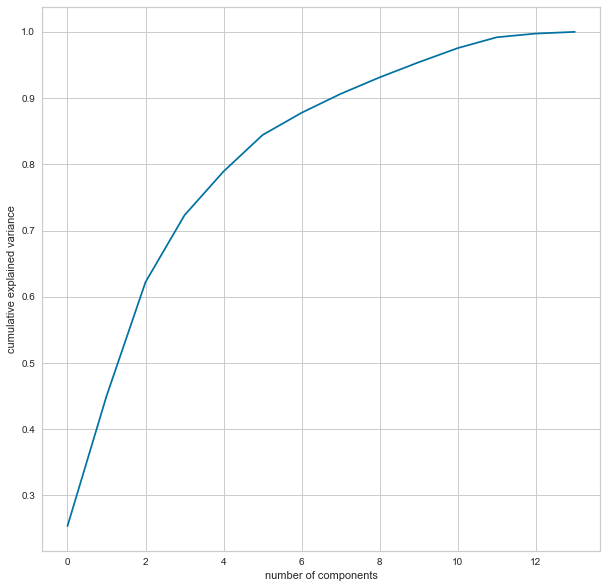

components effect for minmax normalization for Binary part of DF


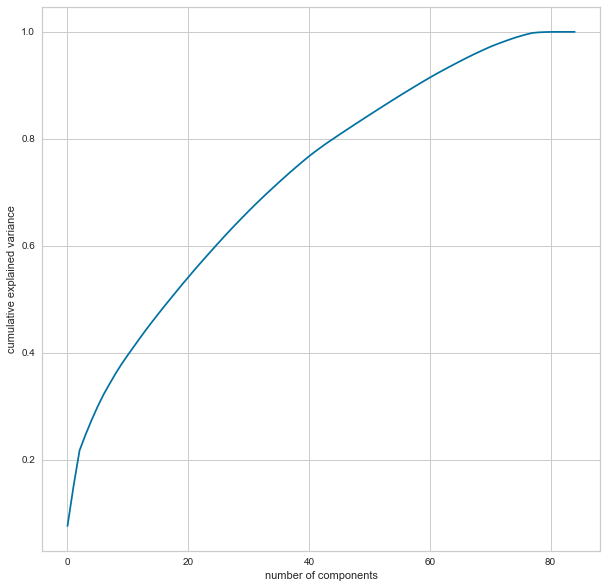

original shape:    (20302, 85)
transformed shape: (20302, 75)
original shape:    (20302, 14)
transformed shape: (20302, 13)
(20302, 13)
(20302, 75)


In [22]:
df_Hot_incoding = preforming_PCA(df_Hot_incoding)

In [23]:
df_Hot_incoding

0         1         2         3         4         5         6   \
0     -0.630700  0.221295 -0.202160  0.072719 -0.023306  0.137571 -0.092581   
1      0.114824 -0.440206  0.384660  0.143780  0.329219  0.167281  0.390722   
2     -0.595071  0.105486 -0.391689 -0.091132 -0.119066 -0.285400  0.062740   
3     -0.189276 -0.336768 -0.034267  0.037141  0.251452 -0.035015 -0.091625   
4      0.194618  0.354369 -0.332967  0.110868  0.164945 -0.088773  0.252969   
...         ...       ...       ...       ...       ...       ...       ...   
20297 -0.189759  0.210670 -0.255411 -0.141609  0.140347 -0.136050 -0.054360   
20298  0.067079  0.057166 -0.114706 -0.233434 -0.192035 -0.022880 -0.219648   
20299 -0.295119 -0.064565  0.428877 -0.149747 -0.058074 -0.332675 -0.238028   
20300 -0.466984  0.182909  0.418584  0.007631  0.045334 -0.040063  0.071565   
20301 -0.287683 -0.228243 -0.169779  0.015399  0.051655  0.157785 -0.147063   

             7         8         9   ...        78        79        80  \
0     -0.047787  0.556583 -0.147373  ... -0.278672 -0.121222  0.108363   
1     -0.178904  0.005139  0.029298  ...  0.013060 -0.128888  0.191528   
2     -0.025875 -0.027102  0.024450  ... -0.138797  0.006795 -0.012778   
3     -0.017295 -0.015877 -0.120356  ... -0.053607  0.132280 -0.012035   
4      0.053489  0.040761 -0.148145  ...  0.118379 -0.333992  0.223121   
...         ...       ...       ...  ...       ...       ...       ...   
20297  0.054632 -0.086848 -0.015011  ...  0.210638  0.090343 -0.069244   
20298  0.134770  0.065226  0.133521  ... -0.104927  0.156362 -0.004037   
20299  0.147139 -0.128707 -0.055421  ...  0.047620  0.048998 -0.131108   
20300  0.140071  0.091589 -0.045488  ...  0.046866  0.376322 -0.027809   
20301 -0.334127  0.057380 -0.059533  ... -0.058147 -0.034348  0.107259   

             81        82        83        84        85        86        87  
0     -0.164994  0.123428  0.827891  0.078759  0.123071 -0.140994 -0.064494  
1      0.372056 -0.104032  0.064903  0.008703 -0.060218  0.035549 -0.043496  
2      0.148525  0.254292 -0.076109  0.010414  0.801830  0.344929 -0.354877  
3      0.093238 -0.068138 -0.054416  0.009866  0.035779 -0.057461  0.042700  
4      0.031126 -0.023384 -0.055448 -0.143116 -0.000013  0.008328  0.044676  
...         ...       ...       ...       ...       ...       ...       ...  
20297  0.072766  0.026799  0.023058  0.076731  0.007932 -0.035219 -0.070852  
20298 -0.163848 -0.087314  0.022203 -0.022124 -0.001596  0.035084  0.003005  
20299  0.106547  0.045595 -0.015840  0.041183 -0.029000 -0.084279 -0.162320  
20300 -0.169506  0.091484 -0.010899 -0.095805  0.014880  0.113227  0.029968  
20301  0.209891 -0.142565 -0.021356 -0.011071 -0.065511  0.189064  0.268890  

[20302 rows x 88 columns]

components effect for minmax normalization for Regular part of DF


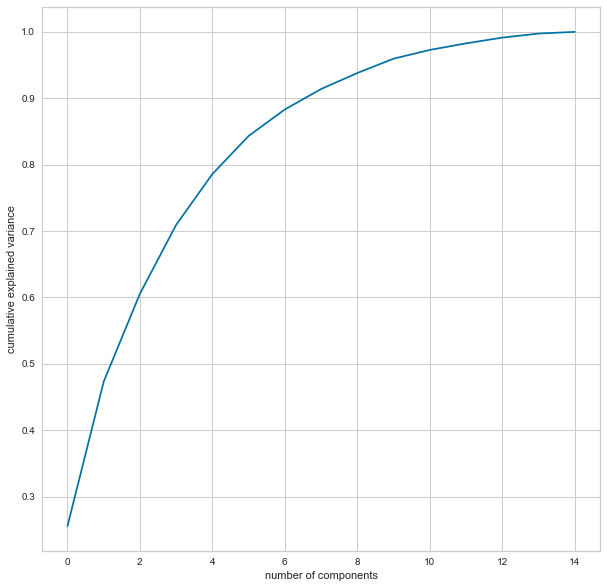

components effect for minmax normalization for Binary part of DF


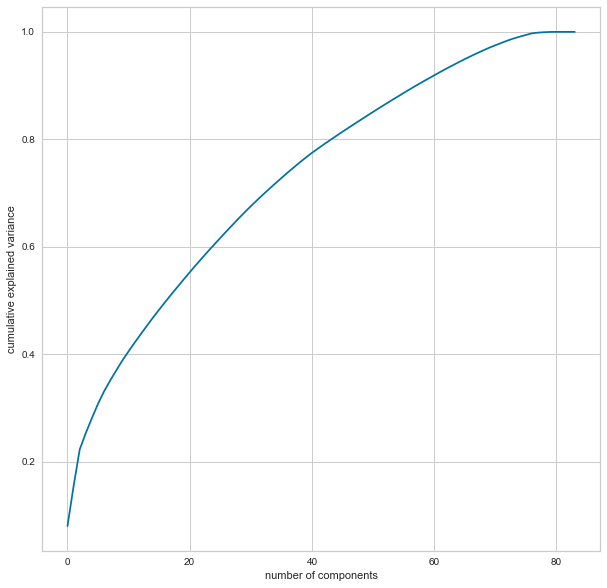

original shape:    (7387, 84)
transformed shape: (7387, 75)
original shape:    (7387, 15)
transformed shape: (7387, 13)
(7387, 13)
(7387, 75)


In [24]:
HotIncoding_test_without_target = preforming_PCA(HotIncoding_test_without_target)


In [25]:
HotIncoding_test_without_target

0         1         2         3         4         5         6   \
0    -0.028449  0.276355 -0.164126 -0.091987  0.162339 -0.408114 -0.067866   
1    -0.223842  0.353384  0.022248  0.106371 -0.294878  0.105651 -0.102134   
2     0.212346 -0.167653  0.148654  0.859215  0.390509 -0.133134  0.029942   
3     0.430203 -0.414205 -0.010407  0.095497 -0.396980 -0.074026 -0.011885   
4     0.087265 -0.309423 -0.021160 -0.095133  0.078555  0.095246  0.036359   
...        ...       ...       ...       ...       ...       ...       ...   
7382  0.309491  0.304136 -0.099990  0.965247  0.202379 -0.089063 -0.079909   
7383 -0.802364  0.154238 -0.266618  0.095702 -0.113757 -0.031557 -0.012520   
7384  0.562541  0.203824 -0.008864  0.053483 -0.324257  0.349477  0.073081   
7385  0.201545 -0.342513  0.074266 -0.022900 -0.133299  0.246612 -0.044374   
7386 -0.172947  0.008656 -0.123641 -0.094070  0.105501  0.173177  0.103523   

            7         8         9   ...        78        79        80  \
0     0.015732 -0.008582 -0.195429  ...  0.314392 -0.137462 -0.199335   
1    -0.024249  0.038197  0.022227  ... -0.055075 -0.068741  0.003367   
2     0.012172  0.168581  0.005695  ... -0.406535 -0.223332  0.136956   
3     0.127837 -0.188478 -0.072050  ... -0.280759  0.007911  0.343765   
4    -0.052987  0.195282  0.041617  ...  0.092530  0.058675 -0.047792   
...        ...       ...       ...  ...       ...       ...       ...   
7382 -0.080261  0.036011  0.043241  ...  0.024137 -0.031614  0.154174   
7383 -0.138296  0.112723  0.034080  ...  0.005280 -0.055126 -0.113017   
7384 -0.030297  0.001153 -0.035062  ...  0.071239  0.017867  0.281558   
7385 -0.048356 -0.093983  0.010517  ... -0.063670  0.070195 -0.045665   
7386  0.125746 -0.094412 -0.076931  ... -0.038863  0.263039 -0.269884   

            81        82        83        84        85        86        87  
0    -0.096005  0.110498 -0.002383 -0.024604 -0.003806 -0.062005  0.011374  
1    -0.245030  0.000045 -0.080566  0.082904 -0.027291 -0.156805 -0.014019  
2    -0.208901  0.025628  0.167763  0.009068 -0.111787  0.015294 -0.123561  
3    -0.212593 -0.089105  0.025350  0.139968  0.064049 -0.112313 -0.008120  
4    -0.032471 -0.005619 -0.035822 -0.021254  0.021052  0.029169  0.005532  
...        ...       ...       ...       ...       ...       ...       ...  
7382 -0.082619  0.045289  0.127246  0.003682 -0.092499  0.004325 -0.107767  
7383  0.063309 -0.134804  0.111282  0.006554 -0.097951 -0.094785  0.037344  
7384 -0.063467  0.143235  0.042956  0.008126 -0.001028 -0.011041 -0.054193  
7385 -0.074545 -0.063478 -0.133465  0.039496 -0.022485 -0.075362 -0.034581  
7386 -0.079912 -0.057274  0.006283 -0.005740 -0.106554 -0.125865  0.016603  

[7387 rows x 88 columns]

### PCA preforming for TargetIncoding <a name="PCA_preforming_for_TargetIncoding" />

hi


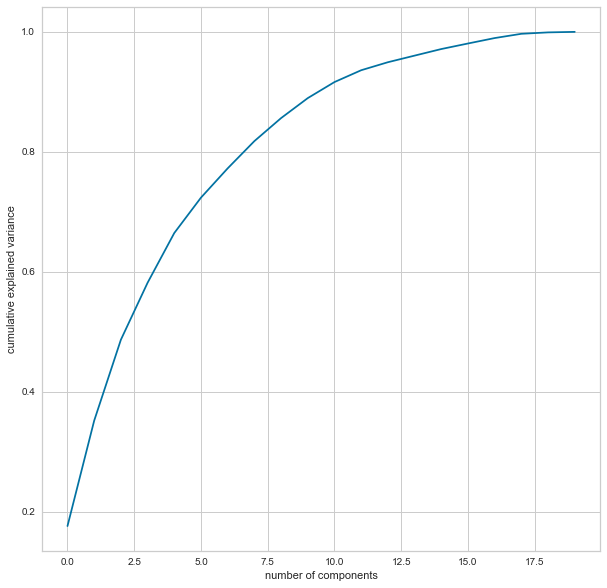

original shape:    (20302, 20)
transformed shape: (20302, 17)


In [26]:
df_target =preforming_PCA(df_target,binaryPart=None,HotIncoding= False )

In [27]:
df_target

0         1         2         3         4         5         6  \
0     -0.332047 -0.169965  0.307411 -0.574402 -0.277362 -0.159364 -0.019518   
1      0.949355 -0.117645 -0.402401  0.186252  0.388166  0.016481  0.114407   
2      0.269352  0.648535  0.523799 -0.712474 -0.063235 -0.169670 -0.107718   
3     -0.082520 -0.381614 -0.051726 -0.197152  0.234728 -0.332132  0.380525   
4     -0.501333  0.190036 -0.046007 -0.032694 -0.387390 -0.185366  0.237243   
...         ...       ...       ...       ...       ...       ...       ...   
20297 -0.145614 -0.328089  0.334488 -0.057046 -0.203236  0.404010 -0.284829   
20298  0.817426  0.128703 -0.271044 -0.059429 -0.143388  0.002837  0.059408   
20299  0.940385 -0.283605  0.383779  0.250986  0.158087  0.343625 -0.225508   
20300  0.427503 -1.160405  0.412589  0.254259 -0.215667 -0.032184  0.038049   
20301 -0.268737 -0.137183  0.042180 -0.400180  0.162234 -0.240414  0.048108   

              7         8         9        10        11        12        13  \
0     -0.028935  0.139673  0.123860 -0.040243  0.114081 -0.014190  0.296860   
1     -0.277161  0.188886  0.314656 -0.345198 -0.193497  0.336648  0.034322   
2      0.171017  0.003097 -0.102758  0.175493 -0.265025  0.024414 -0.039606   
3     -0.022031 -0.305299  0.120392 -0.163546  0.097570 -0.016547 -0.030310   
4      0.354081 -0.123799 -0.142966 -0.074779 -0.023703  0.257729 -0.174156   
...         ...       ...       ...       ...       ...       ...       ...   
20297  0.359487 -0.256287  0.165995  0.038595 -0.067245 -0.076944 -0.013839   
20298 -0.219270 -0.205481 -0.061009  0.212081  0.115509 -0.276354  0.086660   
20299 -0.157982  0.039831 -0.335706  0.086521 -0.313216 -0.390371 -0.036989   
20300  0.013251 -0.077402  0.031309  0.078884  0.021624 -0.014785 -0.018391   
20301  0.063937 -0.016074  0.112501 -0.095344  0.199985  0.083971  0.268165   

             14        15        16  
0      0.472187  0.016583 -0.127974  
1     -0.018974 -0.000266  0.012738  
2     -0.004689 -0.074193  0.025752  
3      0.001061  0.069582 -0.052025  
4      0.154743 -0.057576 -0.042849  
...         ...       ...       ...  
20297 -0.097086 -0.030682 -0.060426  
20298  0.027356  0.008110  0.109838  
20299 -0.118053  0.254738 -0.137566  
20300  0.122155  0.210503  0.052992  
20301 -0.108943  0.001450 -0.087271  

[20302 rows x 17 columns]

hi


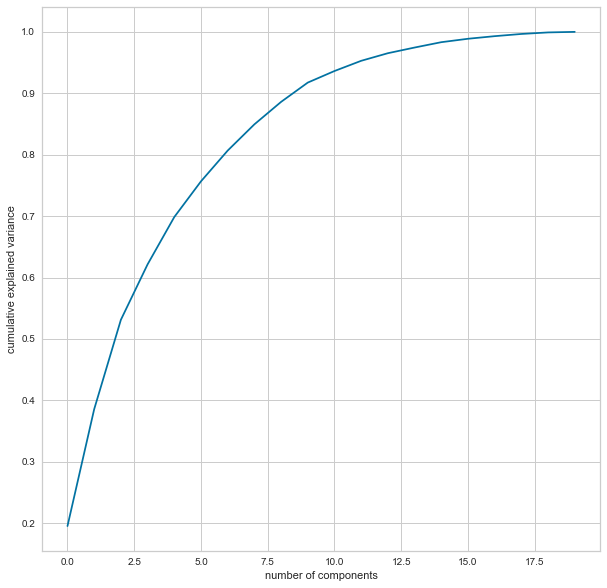

original shape:    (7387, 20)
transformed shape: (7387, 17)


In [28]:
TargetIncoding_test_without_target = preforming_PCA(TargetIncoding_test_without_target,HotIncoding= False,IfLabelAtDf=False )

In [29]:
TargetIncoding_test_without_target

0         1         2         3         4         5         6  \
0     0.172159  0.689349  0.197181  0.133829 -0.291282 -0.154213 -0.311569   
1     0.080104  0.670111  0.382263  0.099027 -0.336832 -0.098864  0.087658   
2    -0.427744 -0.098630 -0.207547 -0.119144  0.040834 -0.112522 -0.021836   
3     0.849282  0.256920 -0.112356 -0.155558  0.766681  0.205963  0.105762   
4    -0.206669  0.841292  0.244983 -0.456001 -0.049047 -0.383506  0.042746   
...        ...       ...       ...       ...       ...       ...       ...   
7382 -0.411886 -0.006652 -0.128349  0.330392 -0.169579 -0.075419 -0.066932   
7383  0.360330  0.425850  0.565279 -0.257135 -0.766055 -0.015622  0.077114   
7384 -0.263762  1.026281 -0.175418  0.176212  0.224277  0.346037  0.208488   
7385 -0.653517  0.031879 -0.269105 -0.328529  0.143173  0.128337 -0.002455   
7386  0.439438 -0.517480 -0.536037  0.126977 -0.217126  0.388035 -0.199360   

             7         8         9        10        11        12        13  \
0    -0.024861  0.196942  0.267808  0.357800 -0.233356  0.008061 -0.143884   
1     0.209649  0.231817 -0.242648 -0.039598 -0.106448 -0.018616  0.027040   
2     0.002204 -0.106775 -0.031155  0.162598 -0.039157  0.028506  0.117408   
3    -0.483665  0.102565 -0.433715 -0.069169 -0.000019  0.016275 -0.157756   
4    -0.101574 -0.148942  0.124460 -0.185338  0.162296  0.084969  0.091876   
...        ...       ...       ...       ...       ...       ...       ...   
7382 -0.193963  0.072407 -0.188207  0.019473 -0.090866 -0.113994  0.067334   
7383  0.053776  0.006599 -0.135593  0.078808 -0.040520 -0.102302  0.094757   
7384  0.198904  0.176044 -0.272878 -0.125406  0.116804 -0.013708 -0.006119   
7385  0.252272  0.111829 -0.046938 -0.121658  0.000731 -0.048257 -0.041596   
7386  0.322267  0.081956  0.019201  0.070248  0.026608  0.045827 -0.098284   

            14        15        16  
0    -0.101063 -0.151340  0.091504  
1     0.007923 -0.043733 -0.038094  
2    -0.134968 -0.232765 -0.002484  
3     0.002506  0.035486  0.000456  
4    -0.011349  0.045220 -0.030466  
...        ...       ...       ...  
7382 -0.064473 -0.034660 -0.000188  
7383 -0.063119  0.020056 -0.038293  
7384 -0.033339 -0.032067  0.046662  
7385  0.083930  0.084644  0.068474  
7386 -0.026795 -0.121848 -0.060559  

[7387 rows x 17 columns]

# Clustering the Data <a name="Clustering" />

   1. [Clustering the TargetIncoding](#Clustering1)
        1. [Looking for the size of cluster](#Clustering1.1)
        2. [Clustering the DF](#Clustering1.2)
   2. [Exploring the HotIncoding Dataframe(experimental Function](#Clustering2)
   3. [Clustering the HotIncoding](#Clustering3)
        1. [Looking for the size of cluster](#Clustering3.1)
        2. [Clustering the DF](#Clustering3.2) 

## Clustering the Target Incoding <a name="Clustering1" />

#### Choose the number K of clusters
use the KElbowVisualizer from the yellowbrick library. As you can see below, the automatic ‘Elbow’ detector says 4 clusters would be the best choice. The way we choose the optimal point is to find the point on the curve where it’s starting to flatten the most (which leads to a great deal of self-interpretation).

### Looking for the size of cluster <a name="Clustering1.1" />

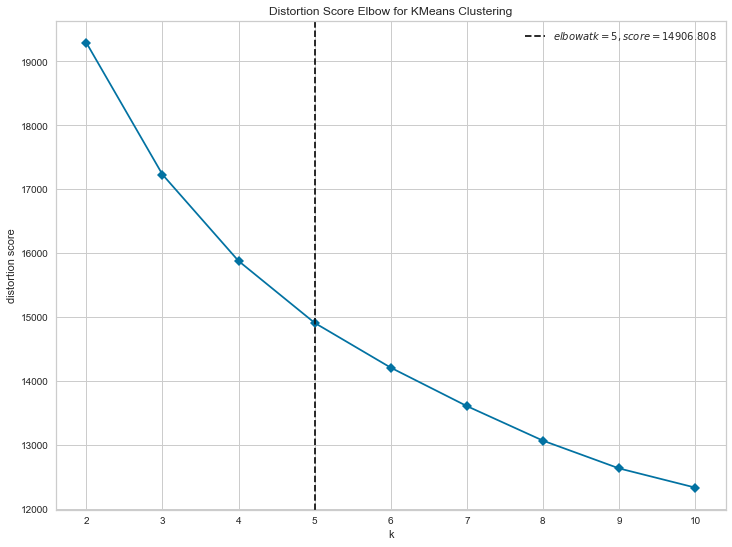

In [30]:
plt.figure(figsize=(12,9))
visualizer = KElbowVisualizer(model=KMeans(random_state=0),timings=False)
visualizer.fit(df_target)
visualizer.show()

### Clustering the DF <a name="Clustering1.2" />

In [31]:
def clusterTargetIncodind(PCA_components):
    clmns=PCA_components.columns.tolist()
    print(PCA_components.columns.tolist())
    df_tr=PCA_components[clmns]
    df_tr_std = stats.zscore(df_tr[clmns])

    #Cluster the data
    kmeans = KMeans(n_clusters=4, random_state=0).fit(df_tr_std)
    labels = kmeans.labels_

    #Glue back to originaal data
    df_tr['clusters'] = labels

    #Add the column into our list
    clmns.extend(['clusters'])
    print (df_tr[clmns].groupby(['clusters']).mean())
    return df_tr


In [32]:
df_target = clusterTargetIncodind(df_target)
df_target

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
                0         1         2         3         4         5   \
clusters                                                               
0         0.517390  0.458686 -0.056668 -0.059254  0.011907 -0.053724   
1        -0.239132 -0.093339 -0.328115 -0.101059 -0.060615  0.073246   
2        -0.308874 -0.090734 -0.024964 -0.028597 -0.007259 -0.233298   
3         0.073129 -0.286075  0.487555  0.219557  0.068588  0.234120   

                6         7         8         9         10        11  \
clusters                                                               
0         0.018231 -0.022773  0.021472  0.008937 -0.002607 -0.005997   
1        -0.075647 -0.051804 -0.003601 -0.024181  0.001806  0.011491   
2         0.087517  0.004148  0.020236  0.031657 -0.011626 -0.021118   
3        -0.027394  0.082947 -0.042032 -0.016325  0.013822  0.016547   

                12        13        14        15        16  
clusters      

0         1         2         3         4         5         6  \
0     -0.332047 -0.169965  0.307411 -0.574402 -0.277362 -0.159364 -0.019518   
1      0.949355 -0.117645 -0.402401  0.186252  0.388166  0.016481  0.114407   
2      0.269352  0.648535  0.523799 -0.712474 -0.063235 -0.169670 -0.107718   
3     -0.082520 -0.381614 -0.051726 -0.197152  0.234728 -0.332132  0.380525   
4     -0.501333  0.190036 -0.046007 -0.032694 -0.387390 -0.185366  0.237243   
...         ...       ...       ...       ...       ...       ...       ...   
20297 -0.145614 -0.328089  0.334488 -0.057046 -0.203236  0.404010 -0.284829   
20298  0.817426  0.128703 -0.271044 -0.059429 -0.143388  0.002837  0.059408   
20299  0.940385 -0.283605  0.383779  0.250986  0.158087  0.343625 -0.225508   
20300  0.427503 -1.160405  0.412589  0.254259 -0.215667 -0.032184  0.038049   
20301 -0.268737 -0.137183  0.042180 -0.400180  0.162234 -0.240414  0.048108   

              7         8         9        10        11        12        13  \
0     -0.028935  0.139673  0.123860 -0.040243  0.114081 -0.014190  0.296860   
1     -0.277161  0.188886  0.314656 -0.345198 -0.193497  0.336648  0.034322   
2      0.171017  0.003097 -0.102758  0.175493 -0.265025  0.024414 -0.039606   
3     -0.022031 -0.305299  0.120392 -0.163546  0.097570 -0.016547 -0.030310   
4      0.354081 -0.123799 -0.142966 -0.074779 -0.023703  0.257729 -0.174156   
...         ...       ...       ...       ...       ...       ...       ...   
20297  0.359487 -0.256287  0.165995  0.038595 -0.067245 -0.076944 -0.013839   
20298 -0.219270 -0.205481 -0.061009  0.212081  0.115509 -0.276354  0.086660   
20299 -0.157982  0.039831 -0.335706  0.086521 -0.313216 -0.390371 -0.036989   
20300  0.013251 -0.077402  0.031309  0.078884  0.021624 -0.014785 -0.018391   
20301  0.063937 -0.016074  0.112501 -0.095344  0.199985  0.083971  0.268165   

             14        15        16  clusters  
0      0.472187  0.016583 -0.127974         2  
1     -0.018974 -0.000266  0.012738         0  
2     -0.004689 -0.074193  0.025752         0  
3      0.001061  0.069582 -0.052025         2  
4      0.154743 -0.057576 -0.042849         2  
...         ...       ...       ...       ...  
20297 -0.097086 -0.030682 -0.060426         3  
20298  0.027356  0.008110  0.109838         0  
20299 -0.118053  0.254738 -0.137566         3  
20300  0.122155  0.210503  0.052992         3  
20301 -0.108943  0.001450 -0.087271         2  

[20302 rows x 18 columns]

In [33]:
TargetIncoding_test_without_target = clusterTargetIncodind(TargetIncoding_test_without_target)
TargetIncoding_test_without_target

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
                0         1         2         3         4         5   \
clusters                                                               
0         0.140441 -0.239469  0.498475  0.002459  0.250438  0.111909   
1        -0.221563 -0.169266 -0.217405  0.015102 -0.085735 -0.030717   
2         0.185288 -0.204380  0.222818  0.060420  0.026200 -0.054919   
3         0.303999  0.631025 -0.052759 -0.046761 -0.059681 -0.029616   

                6         7         8         9         10        11  \
clusters                                                               
0        -0.061372 -0.068961  0.019574  0.006883 -0.037688 -0.029031   
1         0.011340  0.012947 -0.007583  0.005363 -0.006183 -0.015863   
2         0.055148  0.100929 -0.007966 -0.019687  0.267760  0.382617   
3         0.023030  0.017652 -0.000773 -0.014094 -0.004452 -0.014907   

                12        13        14        15        16  
clusters      

0         1         2         3         4         5         6  \
0     0.172159  0.689349  0.197181  0.133829 -0.291282 -0.154213 -0.311569   
1     0.080104  0.670111  0.382263  0.099027 -0.336832 -0.098864  0.087658   
2    -0.427744 -0.098630 -0.207547 -0.119144  0.040834 -0.112522 -0.021836   
3     0.849282  0.256920 -0.112356 -0.155558  0.766681  0.205963  0.105762   
4    -0.206669  0.841292  0.244983 -0.456001 -0.049047 -0.383506  0.042746   
...        ...       ...       ...       ...       ...       ...       ...   
7382 -0.411886 -0.006652 -0.128349  0.330392 -0.169579 -0.075419 -0.066932   
7383  0.360330  0.425850  0.565279 -0.257135 -0.766055 -0.015622  0.077114   
7384 -0.263762  1.026281 -0.175418  0.176212  0.224277  0.346037  0.208488   
7385 -0.653517  0.031879 -0.269105 -0.328529  0.143173  0.128337 -0.002455   
7386  0.439438 -0.517480 -0.536037  0.126977 -0.217126  0.388035 -0.199360   

             7         8         9        10        11        12        13  \
0    -0.024861  0.196942  0.267808  0.357800 -0.233356  0.008061 -0.143884   
1     0.209649  0.231817 -0.242648 -0.039598 -0.106448 -0.018616  0.027040   
2     0.002204 -0.106775 -0.031155  0.162598 -0.039157  0.028506  0.117408   
3    -0.483665  0.102565 -0.433715 -0.069169 -0.000019  0.016275 -0.157756   
4    -0.101574 -0.148942  0.124460 -0.185338  0.162296  0.084969  0.091876   
...        ...       ...       ...       ...       ...       ...       ...   
7382 -0.193963  0.072407 -0.188207  0.019473 -0.090866 -0.113994  0.067334   
7383  0.053776  0.006599 -0.135593  0.078808 -0.040520 -0.102302  0.094757   
7384  0.198904  0.176044 -0.272878 -0.125406  0.116804 -0.013708 -0.006119   
7385  0.252272  0.111829 -0.046938 -0.121658  0.000731 -0.048257 -0.041596   
7386  0.322267  0.081956  0.019201  0.070248  0.026608  0.045827 -0.098284   

            14        15        16  clusters  
0    -0.101063 -0.151340  0.091504         3  
1     0.007923 -0.043733 -0.038094         3  
2    -0.134968 -0.232765 -0.002484         1  
3     0.002506  0.035486  0.000456         0  
4    -0.011349  0.045220 -0.030466         3  
...        ...       ...       ...       ...  
7382 -0.064473 -0.034660 -0.000188         1  
7383 -0.063119  0.020056 -0.038293         3  
7384 -0.033339 -0.032067  0.046662         3  
7385  0.083930  0.084644  0.068474         1  
7386 -0.026795 -0.121848 -0.060559         1  

[7387 rows x 18 columns]

## Exploring the HotIncoding Dataframe(experimental Functions) <a name="Clustering2" />

In [34]:
def find_elbow_value_(df):
    visualizer = KElbowVisualizer(model=KMeans(random_state=0),timings=False)
    visualizer.fit(df)
    return visualizer.elbow_value_
def findBestCluster( df, sizeOfCluster ,RightLabel,thresh):
    returned_sets=[]
    counter=0
    listToRun=list(itertools.combinations(range(len(df.columns)), sizeOfCluster))
    for subCombi in listToRun:
        counter+=1
        sub=list(subCombi)
        Df_elbo=find_elbow_value_(df[sub])
        if (visualizer.elbow_value_ ==None):
            print("Whhhaaa")
            print("Run: "+str(counter)+" of "+str(len(listToRun))+" Elbo "+str(Df_elbo)+ "set:"+str(sub))
            continue
        else:
            print("################################################################")
            print("Run: "+str(counter)+" of "+str(len(listToRun))+" Elbo "+str(Df_elbo))
            kmeans = KMeans(n_clusters=Df_elbo, random_state=0).fit(df[sub])
            labels = kmeans.labels_

            #Glue back to originaal data
            df[sub]['clusters'] = labels
            corr=np.corrcoef(labels,RightLabel)
            if corr[0][1]>=thresh:
                returned_sets.append([sub,corr[0][1]])
            print('The Corr of '+str(sub)+' is: '+str(corr[0][1]))
    return returned_sets


def ShowCluster3D(TestClusterDf,Col1,Col2,Col3):
    TestClusterDf['x']=TestClusterDf[[Col1]]
    TestClusterDf['y']=TestClusterDf[[Col2]]
    TestClusterDf['z']=TestClusterDf[[Col3]]
    TestClusterDf=TestClusterDf[['x','y','z']]
    TestClusterDf=TestClusterDf[['x','y','z']]#.round({"x":2, "y":2, "z":2}) 
    scatter = dict(
        mode = "markers",
        name = "y",
        type = "scatter3d",
        x = TestClusterDf['x'], y = TestClusterDf['y'], z = TestClusterDf['z'],
        marker = dict( size=2, color="rgb(23, 190, 207)" )
    )
    clusters = dict(
        alphahull = 15,
        name = "y",
        opacity = 0.1,
        type = "mesh3d",
        x = TestClusterDf['x'], y = TestClusterDf['y'], z = TestClusterDf['z']
    )
    layout = dict(
        title = '3d point clustering',
        scene = dict(
            xaxis = dict( zeroline=False ),
            yaxis = dict( zeroline=False ),
            zaxis = dict( zeroline=False ),
        )
    )
    fig = dict( data=[scatter, clusters], layout=layout )
    # Use py.iplot() for IPython notebook
    iplot(fig, filename='3d point clustering')

In [35]:
TestClusterDf=df_Hot_incoding.copy().sample(n = 1000) 
TestClusterDf

0         1         2         3         4         5         6   \
5177   0.263370  0.144796 -0.316896 -0.107310  0.175990  0.197621 -0.119348   
6621   0.260003  0.351956 -0.108543 -0.184456  0.012103 -0.083518 -0.141639   
16013  0.051449 -0.181904  0.196552 -0.388004 -0.209404 -0.311004  0.178625   
14065  0.185144 -0.270592 -0.150604  0.489381  0.043646 -0.177094 -0.160003   
16726  0.671184 -0.463287 -0.110098  0.159219 -0.034209  0.117990  0.127983   
...         ...       ...       ...       ...       ...       ...       ...   
11800  0.431362 -0.496952  0.202400 -0.213061 -0.020973  0.119799 -0.247997   
1541  -0.451643  0.549342  0.281819  0.415387 -0.239268  0.014123 -0.036714   
8642  -0.664525  0.197652 -0.122563 -0.022101 -0.264308  0.135889  0.049906   
3164  -0.371080 -0.152316  0.183120 -0.002895  0.027148  0.342644 -0.287003   
17016 -0.113101  0.220079 -0.410395 -0.049546  0.232183  0.086588  0.147992   

             7         8         9   ...        78        79        80  \
5177   0.023436 -0.027290 -0.024827  ...  0.082402  0.001757  0.078987   
6621   0.103107 -0.145224  0.077935  ... -0.129454 -0.090632  0.115464   
16013 -0.051399  0.066999 -0.010267  ...  0.113571 -0.184750  0.053821   
14065  0.040682 -0.011395 -0.096679  ... -0.055480  0.532208  0.314773   
16726 -0.212868  0.019751  0.077208  ...  0.098698  0.136137  0.384544   
...         ...       ...       ...  ...       ...       ...       ...   
11800 -0.026384 -0.033787 -0.075652  ...  0.167522 -0.265164 -0.222336   
1541   0.129670  0.031370 -0.161606  ...  0.265873  0.115463 -0.312348   
8642  -0.296558  0.065297 -0.174789  ... -0.014077  0.027206  0.259317   
3164  -0.162631 -0.314373 -0.025642  ... -0.101383 -0.018055  0.163522   
17016 -0.067461 -0.020209  0.036424  ... -0.272715 -0.360401  0.147537   

             81        82        83        84        85        86        87  
5177  -0.375619 -0.057182 -0.079495 -0.140167  0.028006  0.041252  0.047309  
6621  -0.068658  0.017554 -0.072476 -0.068848  0.013678  0.055414  0.186742  
16013 -0.062056 -0.063578  0.051684 -0.079438 -0.062008  0.054288 -0.004922  
14065 -0.035077  0.167096  0.092314  0.128840 -0.238500  0.124781 -0.082374  
16726  0.065970  0.098622 -0.072098 -0.130361  0.049660 -0.080447  0.154832  
...         ...       ...       ...       ...       ...       ...       ...  
11800  0.115930  0.289072 -0.059588  0.620367  0.194311 -0.253686  0.499948  
1541  -0.025912  0.085597  0.202719 -0.156292 -0.053336 -0.012940 -0.055717  
8642  -0.040251 -0.034602 -0.020426 -0.264558  0.042716 -0.031245  0.146018  
3164  -0.083240 -0.147378 -0.089369  0.062556  0.030719 -0.108573 -0.087859  
17016  0.234678 -0.052987 -0.039417 -0.025948 -0.088700 -0.032448  0.117198  

[1000 rows x 88 columns]

## Clustering the HotIncoding <a name="Clustering3" />

In [36]:
TestClusterDf=df_Hot_incoding.copy().sample(n = 1000) 
#ShowCluster3D(TestClusterDf,0,3,84)
for i in range(10):
    option1, option2, option3 = random.sample(range(0, 85), 3)
    tup1=(option1, option2, option3)
    print(tup1)
    ShowCluster3D(TestClusterDf,option1,option2,option3)


(1, 22, 5)


(73, 44, 31)


(78, 14, 49)


(70, 78, 73)


(6, 18, 77)


(48, 10, 67)


(32, 64, 59)


(64, 79, 67)


(46, 14, 42)


(13, 28, 36)


In [37]:
ShowCluster3D(TestClusterDf,13, 75, 32)

### Looking for the size of cluster<a name="Clustering3.1" />

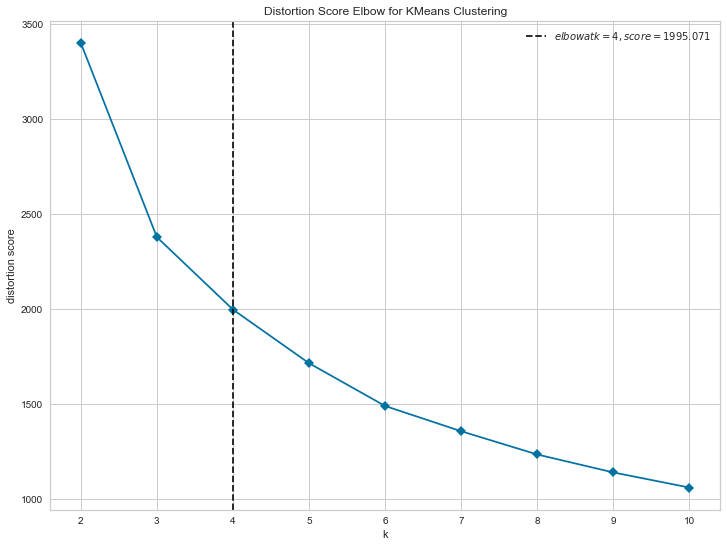

In [38]:
#(13, 75, 32)
TestClusterDf=df_Hot_incoding[[13, 75, 32]]
plt.figure(figsize=(12,9))
visualizer = KElbowVisualizer(model=KMeans(random_state=0),timings=False)
visualizer.fit(TestClusterDf)
visualizer.show()

### Clustering the DF<a name="Clustering3.2" />

In [39]:
def clusterHotIncoding(df):
    df_trHotIcoding = df[[13, 75, 32]]
    df_trHotIcoding['x']=df_trHotIcoding[[13]]
    df_trHotIcoding['y']=df_trHotIcoding[[75]]
    df_trHotIcoding['z']=df_trHotIcoding[[32]]
    df_trHotIcoding=df_trHotIcoding[['x','y','z']]
    clmns=df_trHotIcoding.columns.tolist()

    #Cluster the data
    kmeans = KMeans(n_clusters=5, random_state=0).fit(df_trHotIcoding)
    labels = kmeans.labels_

    #Glue back to originaal data
    df_trHotIcoding['clusters'] = labels

    #Add the column into our list
    clmns.extend(['clusters'])

    #Lets analyze the clusters
    print (df_trHotIcoding[clmns].groupby(['clusters']).mean())
    df['clusters'] = df_trHotIcoding['clusters']
    return df

df_Hot_incoding=clusterHotIncoding(df_Hot_incoding)
HotIncoding_test_without_target=clusterHotIncoding(HotIncoding_test_without_target)

                 x         y         z
clusters                              
0         1.314042 -0.000683  0.001373
1         0.048136  0.001824 -0.011114
2        -0.480126 -0.012709 -0.184762
3        -0.469731  0.012846  0.215570
4         0.799323 -0.001455 -0.000440
                 x         y         z
clusters                              
0         1.021056 -0.004455 -0.228296
1        -0.455494  0.003489 -0.189385
2        -0.376055 -0.004934  0.249287
3         1.055172  0.003328  0.191736
4        -0.098299  0.002381 -0.081536


In [40]:
df_Hot_incoding

0         1         2         3         4         5         6  \
0     -0.630700  0.221295 -0.202160  0.072719 -0.023306  0.137571 -0.092581   
1      0.114824 -0.440206  0.384660  0.143780  0.329219  0.167281  0.390722   
2     -0.595071  0.105486 -0.391689 -0.091132 -0.119066 -0.285400  0.062740   
3     -0.189276 -0.336768 -0.034267  0.037141  0.251452 -0.035015 -0.091625   
4      0.194618  0.354369 -0.332967  0.110868  0.164945 -0.088773  0.252969   
...         ...       ...       ...       ...       ...       ...       ...   
20297 -0.189759  0.210670 -0.255411 -0.141609  0.140347 -0.136050 -0.054360   
20298  0.067079  0.057166 -0.114706 -0.233434 -0.192035 -0.022880 -0.219648   
20299 -0.295119 -0.064565  0.428877 -0.149747 -0.058074 -0.332675 -0.238028   
20300 -0.466984  0.182909  0.418584  0.007631  0.045334 -0.040063  0.071565   
20301 -0.287683 -0.228243 -0.169779  0.015399  0.051655  0.157785 -0.147063   

              7         8         9  ...        79        80        81  \
0     -0.047787  0.556583 -0.147373  ... -0.121222  0.108363 -0.164994   
1     -0.178904  0.005139  0.029298  ... -0.128888  0.191528  0.372056   
2     -0.025875 -0.027102  0.024450  ...  0.006795 -0.012778  0.148525   
3     -0.017295 -0.015877 -0.120356  ...  0.132280 -0.012035  0.093238   
4      0.053489  0.040761 -0.148145  ... -0.333992  0.223121  0.031126   
...         ...       ...       ...  ...       ...       ...       ...   
20297  0.054632 -0.086848 -0.015011  ...  0.090343 -0.069244  0.072766   
20298  0.134770  0.065226  0.133521  ...  0.156362 -0.004037 -0.163848   
20299  0.147139 -0.128707 -0.055421  ...  0.048998 -0.131108  0.106547   
20300  0.140071  0.091589 -0.045488  ...  0.376322 -0.027809 -0.169506   
20301 -0.334127  0.057380 -0.059533  ... -0.034348  0.107259  0.209891   

             82        83        84        85        86        87  clusters  
0      0.123428  0.827891  0.078759  0.123071 -0.140994 -0.064494         2  
1     -0.104032  0.064903  0.008703 -0.060218  0.035549 -0.043496         3  
2      0.254292 -0.076109  0.010414  0.801830  0.344929 -0.354877         2  
3     -0.068138 -0.054416  0.009866  0.035779 -0.057461  0.042700         1  
4     -0.023384 -0.055448 -0.143116 -0.000013  0.008328  0.044676         2  
...         ...       ...       ...       ...       ...       ...       ...  
20297  0.026799  0.023058  0.076731  0.007932 -0.035219 -0.070852         0  
20298 -0.087314  0.022203 -0.022124 -0.001596  0.035084  0.003005         3  
20299  0.045595 -0.015840  0.041183 -0.029000 -0.084279 -0.162320         4  
20300  0.091484 -0.010899 -0.095805  0.014880  0.113227  0.029968         0  
20301 -0.142565 -0.021356 -0.011071 -0.065511  0.189064  0.268890         1  

[20302 rows x 89 columns]

In [41]:
HotIncoding_test_without_target

0         1         2         3         4         5         6  \
0    -0.028449  0.276355 -0.164126 -0.091987  0.162339 -0.408114 -0.067866   
1    -0.223842  0.353384  0.022248  0.106371 -0.294878  0.105651 -0.102134   
2     0.212346 -0.167653  0.148654  0.859215  0.390509 -0.133134  0.029942   
3     0.430203 -0.414205 -0.010407  0.095497 -0.396980 -0.074026 -0.011885   
4     0.087265 -0.309423 -0.021160 -0.095133  0.078555  0.095246  0.036359   
...        ...       ...       ...       ...       ...       ...       ...   
7382  0.309491  0.304136 -0.099990  0.965247  0.202379 -0.089063 -0.079909   
7383 -0.802364  0.154238 -0.266618  0.095702 -0.113757 -0.031557 -0.012520   
7384  0.562541  0.203824 -0.008864  0.053483 -0.324257  0.349477  0.073081   
7385  0.201545 -0.342513  0.074266 -0.022900 -0.133299  0.246612 -0.044374   
7386 -0.172947  0.008656 -0.123641 -0.094070  0.105501  0.173177  0.103523   

             7         8         9  ...        79        80        81  \
0     0.015732 -0.008582 -0.195429  ... -0.137462 -0.199335 -0.096005   
1    -0.024249  0.038197  0.022227  ... -0.068741  0.003367 -0.245030   
2     0.012172  0.168581  0.005695  ... -0.223332  0.136956 -0.208901   
3     0.127837 -0.188478 -0.072050  ...  0.007911  0.343765 -0.212593   
4    -0.052987  0.195282  0.041617  ...  0.058675 -0.047792 -0.032471   
...        ...       ...       ...  ...       ...       ...       ...   
7382 -0.080261  0.036011  0.043241  ... -0.031614  0.154174 -0.082619   
7383 -0.138296  0.112723  0.034080  ... -0.055126 -0.113017  0.063309   
7384 -0.030297  0.001153 -0.035062  ...  0.017867  0.281558 -0.063467   
7385 -0.048356 -0.093983  0.010517  ...  0.070195 -0.045665 -0.074545   
7386  0.125746 -0.094412 -0.076931  ...  0.263039 -0.269884 -0.079912   

            82        83        84        85        86        87  clusters  
0     0.110498 -0.002383 -0.024604 -0.003806 -0.062005  0.011374         2  
1     0.000045 -0.080566  0.082904 -0.027291 -0.156805 -0.014019         1  
2     0.025628  0.167763  0.009068 -0.111787  0.015294 -0.123561         1  
3    -0.089105  0.025350  0.139968  0.064049 -0.112313 -0.008120         0  
4    -0.005619 -0.035822 -0.021254  0.021052  0.029169  0.005532         2  
...        ...       ...       ...       ...       ...       ...       ...  
7382  0.045289  0.127246  0.003682 -0.092499  0.004325 -0.107767         4  
7383 -0.134804  0.111282  0.006554 -0.097951 -0.094785  0.037344         1  
7384  0.143235  0.042956  0.008126 -0.001028 -0.011041 -0.054193         1  
7385 -0.063478 -0.133465  0.039496 -0.022485 -0.075362 -0.034581         2  
7386 -0.057274  0.006283 -0.005740 -0.106554 -0.125865  0.016603         1  

[7387 rows x 89 columns]

## OverSampling <a name="OverSampling" />
SMOTE algorithm uses the nearest neighbors of observations to create synthetic data, it still bleeds information.<br>
If the nearest neighbors of minority class observations in the training set end up in the validation set, their information is partially captured by the synthetic data in the training set. <br>
Since I’m splitting the data randomly, we’d expect to have this happen. As a result, the model will be better able to predict validation set values than completely new data.

In [42]:
#from imblearn.over_sampling import SMOTE
#df_target
#df_Hot_incoding
#print("df_target"+str(df_target.shape))
#print("df_Hot_incoding"+str(df_target.shape))
#df_target, df_target_x_val, TrainTrue_labe_df_target, df_target_y_val = train_test_split(df_target, TrainTrue_labe_df_target,test_size = .1,random_state=12)
#sm = SMOTE(kind='borderline2')
#sm = SMOTE(sampling_strategy='auto', k_neighbors=9, random_state=100)
#df_target, TrainTrue_labe_df_target = sm.fit_sample(df_target, TrainTrue_labe_df_target)
#df_target_x_val,df_target_y_val,df_Hot_incoding_x_val,df_Hot_incoding_y_val
#df_Hot_incoding, df_Hot_incoding_x_val, TrainTrue_label, df_Hot_incoding_y_val = train_test_split(df_Hot_incoding, TrainTrue_label,test_size = .1,random_state=12)
#sm = SMOTE(random_state=12)
#sm = SMOTE(sampling_strategy='auto', k_neighbors=9, random_state=100)
#df_Hot_incoding, TrainTrue_label = sm.fit_sample(df_Hot_incoding, TrainTrue_label)
#print("df_target"+str(df_target.shape))
#print("df_Hot_incoding"+str(df_target.shape))

#print("df_target"+str(df_target.shape))
#print("df_Hot_incoding"+str(df_Hot_incoding.shape))
#df_target,TrainTrue_labe_df_target = Random_under_sampling(df_target,TrainTrue_labe_df_target)
#df_Hot_incoding,TrainTrue_label = Random_under_sampling(df_Hot_incoding,TrainTrue_label)
#print("df_target"+str(df_target.shape))
#print("df_Hot_incoding"+str(df_Hot_incoding.shape))
from imblearn.over_sampling import SMOTE
SmothFlag=True
if (SmothFlag==False):
    df_target, df_target_x_val, TrainTrue_labe_df_target, df_target_y_val = train_test_split(df_target, TrainTrue_labe_df_target,test_size = .1,random_state=12)
    df_Hot_incoding, df_Hot_incoding_x_val, TrainTrue_label, df_Hot_incoding_y_val = train_test_split(df_Hot_incoding, TrainTrue_label,test_size = .1,random_state=12)
    print("df_target"+str(df_target.shape))
    print("df_Hot_incoding"+str(df_Hot_incoding.shape))
    df_target,TrainTrue_labe_df_target = Random_under_sampling(df_target,TrainTrue_labe_df_target)
    df_Hot_incoding,TrainTrue_label = Random_under_sampling(df_Hot_incoding,TrainTrue_label)
    print("df_target"+str(df_target.shape))
    print("df_Hot_incoding"+str(df_Hot_incoding.shape))
else:
    print("df_target"+str(df_target.shape))
    print("df_Hot_incoding"+str(df_Hot_incoding.shape))
    df_target, df_target_x_val, TrainTrue_labe_df_target, df_target_y_val = train_test_split(df_target, TrainTrue_labe_df_target,test_size = .1,random_state=12)
    df_Hot_incoding, df_Hot_incoding_x_val, TrainTrue_label, df_Hot_incoding_y_val = train_test_split(df_Hot_incoding, TrainTrue_label,test_size = .1,random_state=12)
    sm = SMOTE(sampling_strategy='auto', k_neighbors=9, random_state=100)
    df_target, TrainTrue_labe_df_target = sm.fit_sample(df_target, TrainTrue_labe_df_target)
    sm = SMOTE(sampling_strategy='auto', k_neighbors=9, random_state=100)
    df_Hot_incoding, TrainTrue_label = sm.fit_sample(df_Hot_incoding, TrainTrue_label)
    print("df_target"+str(df_target.shape))
    print("df_Hot_incoding"+str(df_Hot_incoding.shape))

df_target(20302, 18)
df_Hot_incoding(20302, 89)
df_target(29346, 18)
df_Hot_incoding(29346, 89)


In [43]:
df_target

0         1         2         3         4         5         6  \
0      0.354735  0.778754 -0.338514 -0.366673  0.236357  0.198542 -0.484564   
1      0.190386 -0.828881  0.231061  0.182908 -0.002583  0.199076  0.365691   
2     -0.301779 -0.393903  0.561755  0.382764  0.672630 -0.064145 -0.009106   
3      0.273375  0.824745 -0.160054 -0.341116  0.210212  0.227045 -0.338480   
4     -0.099147 -0.408163  0.259936 -0.771785 -0.296503 -0.027206 -0.016793   
...         ...       ...       ...       ...       ...       ...       ...   
29341  0.871222 -0.117251  0.297288 -0.008874 -0.209128 -0.536233  0.128753   
29342 -0.337874 -0.234120  0.848675  0.190784 -0.534872  0.240193  0.308866   
29343 -0.177559 -0.503805  0.758177  0.394170 -0.320044  0.198406 -0.227007   
29344  1.050474 -0.393819  0.279274 -0.043054 -0.077652  0.540189 -0.090455   
29345  0.561533  0.140100  0.917997 -0.170114 -0.036219  0.076739 -0.178281   

              7         8         9        10        11        12        13  \
0      0.241621  0.056142 -0.222447 -0.112990  0.293428  0.217114 -0.177678   
1      0.193409 -0.242370 -0.040567 -0.011418 -0.013077 -0.092355  0.085493   
2      0.055925  0.173514  0.148007 -0.027879  0.382269  0.020054  0.209197   
3      0.070357  0.032024 -0.048636 -0.153570  0.118398 -0.000877  0.007528   
4     -0.252154  0.341802 -0.620773  0.003892 -0.085803 -0.012826  0.131729   
...         ...       ...       ...       ...       ...       ...       ...   
29341 -0.055655  0.362520 -0.112969 -0.002165  0.096480 -0.105892  0.019740   
29342  0.089984  0.249458  0.227440  0.167581  0.211501 -0.104371 -0.001299   
29343 -0.339076  0.096228  0.407948  0.330226 -0.084535 -0.121571 -0.129742   
29344  0.153622  0.166413 -0.153936 -0.040162 -0.189007 -0.187683 -0.035967   
29345  0.286738  0.136641 -0.062852  0.050445  0.135000 -0.009015  0.266751   

             14        15        16  clusters  
0      0.056458  0.081643 -0.191175         0  
1     -0.201554  0.099210  0.064134         3  
2      0.068940  0.008511  0.035295         3  
3      0.086289  0.120398 -0.090335         0  
4      0.136403 -0.046992 -0.150877         1  
...         ...       ...       ...       ...  
29341 -0.023516 -0.001120 -0.052252         0  
29342  0.027197  0.130760 -0.002731         3  
29343  0.162017 -0.205806 -0.071995         3  
29344  0.136639 -0.004571  0.031965         3  
29345 -0.139035  0.050238  0.053770         3  

[29346 rows x 18 columns]

# Base Models <a name="BasicModels" />


   1. [Logistic Regression](#Logistic_Regression)
        1. [Logistic Regression for TargetIncoding](#Logistic_Regression1)
        2. [Logistic Regression for HotIncoding](#Logistic_Regression2)
   2. [K nearest neighbor classification](#KNN)
        1. [KNN for TargetIncoding](#KNN1)
        2. [KNN for HotIncoding](#KNN2)


| Variable | Meaning | 
| --- | --- | 
| TrainTrue_label | The real label for OneHot incoding | 
| TrainTrue_labe_df_target | The real label for target incoding | 
| df_target | The target incoding table as DF | 
| df_Hot_incoding | The Hot incoding table as DF | 
| TargetIncoding_test_without_target | The Hot target final run to submit table as DF | 
| HotIncoding_test_without_target | The Hot incoding final run to submit table as DF | 
| df_target_x_val | The Hot incoding validtaion | 
| df_Hot_incoding_x_val | The Hot incoding validtaion | 




In [44]:
TrainTrue_label

0        0
1        0
2        0
3        0
4        0
        ..
29341    1
29342    1
29343    1
29344    1
29345    1
Name: label, Length: 29346, dtype: int64

In [45]:
def plot_roc_curve(fpr, tpr):  
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', label='ROC') #The ROC curve of the train
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--') #The random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(["AUC=%.3f"%auc(fpr, tpr)], loc = 'lower right')
    plt.show()

## Logistic Regression <a name="Logistic_Regression" />

### Logistic for Target Incoding <a name="Logistic_Regression1" />

In [46]:
y = TrainTrue_labe_df_target.to_numpy()
X = df_target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True,random_state=42)
clf = LogisticRegression(# ---The regularization hyperparameters---
                         penalty="l1", # As shown above - l1 stands for abs distance, l2 stands for quad_distances
                         C=1, # Inverse regularization parameter, larger C means less regularization.
                         solver='liblinear', # Algorithm to use in the optimization problem
                         # ---The Optimization parameters---
                         tol=0.0001, # Stopping critiria
                         max_iter=100) # For some optimization algorithms, the algorithm solves it with iterations.
clf.fit(X_train, y_train)
clf.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [47]:
print (clf.score(X_test, y_test))
print (np.mean(clf.predict(X_test)==y_test))

0.7848218895198761
0.7848218895198761


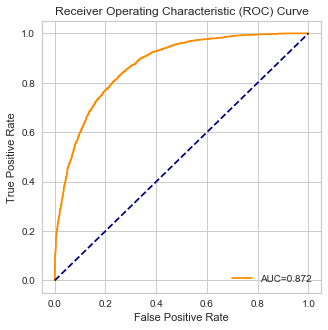

In [48]:
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plot_roc_curve(fpr, tpr)

### Logistic for Hot Incoding <a name="Logistic_Regression2" />

0.8099122354155911
0.8099122354155911


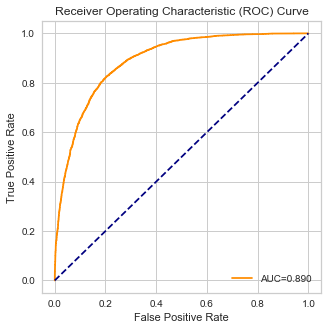

In [49]:
def LogisticCheck(df_Hot_incoding,TrainTrue_labe_df_target):
    y = TrainTrue_labe_df_target.to_numpy()
    X = df_Hot_incoding.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True,random_state=54)
    clf = LogisticRegression(# ---The regularization hyperparameters---
                             penalty="l1", # As shown above - l1 stands for abs distance, l2 stands for quad_distances
                             C=100, # Inverse regularization parameter, larger C means less regularization.
                             solver='liblinear', # Algorithm to use in the optimization problem
                             # ---The Optimization parameters---
                             tol=0.0001, # Stopping critiria
                             max_iter=100) # For some optimization algorithms, the algorithm solves it with iterations.
    clf.fit(X_train, y_train)
    clf.predict(X_test)
    print (clf.score(X_test, y_test))
    print (np.mean(clf.predict(X_test)==y_test))
    y_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plot_roc_curve(fpr, tpr)
LogisticCheck(df_Hot_incoding,TrainTrue_label)

In [50]:
print (clf.score(X_test, y_test))
print (np.mean(clf.predict(X_test)==y_test))

0.7848218895198761
0.7848218895198761


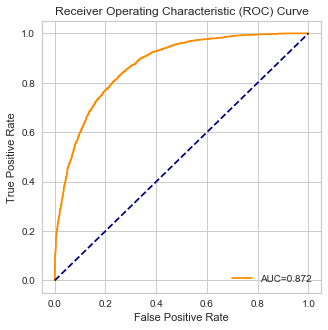

In [51]:
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plot_roc_curve(fpr, tpr)

## K nearest neighbor classification <a name="KNN" />

### KNN for Target Incoding <a name="KNN1" />

In [52]:
y = pd.DataFrame(TrainTrue_label.to_numpy())
X = pd.DataFrame(df_target.values)

In [53]:
for i in range(30):
    if i <3:
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)

    print("For K = "+str(i)+"  Accuracy:",metrics.accuracy_score(y_test, y_pred))

For K = 3  Accuracy: 0.8584734211721945
For K = 4  Accuracy: 0.8707405724670604
For K = 5  Accuracy: 0.839845524761472
For K = 6  Accuracy: 0.8550658791458428
For K = 7  Accuracy: 0.8331440254429805
For K = 8  Accuracy: 0.8401862789641072
For K = 9  Accuracy: 0.8255338482507951
For K = 10  Accuracy: 0.836210813266697
For K = 11  Accuracy: 0.8243980009086779
For K = 12  Accuracy: 0.8261017719218537
For K = 13  Accuracy: 0.8134938664243526
For K = 14  Accuracy: 0.8197410268059973
For K = 15  Accuracy: 0.8220127214902317
For K = 16  Accuracy: 0.8204225352112676
For K = 17  Accuracy: 0.8134938664243526
For K = 18  Accuracy: 0.8115629259427533
For K = 19  Accuracy: 0.8059972739663789
For K = 20  Accuracy: 0.8138346206269877
For K = 21  Accuracy: 0.7990686051794639
For K = 22  Accuracy: 0.8056565197637438
For K = 23  Accuracy: 0.8052021808268969
For K = 24  Accuracy: 0.811676510676965
For K = 25  Accuracy: 0.8021353930031804
For K = 26  Accuracy: 0.8062244434348024
For K = 27  Accuracy: 0.80

### KNN for Hot Incoding <a name="KNN2" />

In [54]:
y = TrainTrue_label.to_numpy()
X = df_Hot_incoding.values

In [55]:
for i in range(10):
    if i <3:
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)

    print("For K = "+str(i)+"  Accuracy:",metrics.accuracy_score(y_test, y_pred))

For K = 3  Accuracy: 0.799409359382099
For K = 4  Accuracy: 0.791685597455702
For K = 5  Accuracy: 0.7940708768741481
For K = 6  Accuracy: 0.7874829622898682
For K = 7  Accuracy: 0.7930486142662426
For K = 8  Accuracy: 0.7966833257610177
For K = 9  Accuracy: 0.795774647887324


# Executing gridsearch to find parameters for models <a name="gridsearch" />
  1. [KNN](#GS_KNN)
  2. [ANN - Artificial neural network](#GS_ANN)
  3. [logistic regession(Kfold)](#GS_LR) 
  4. [Random Forest](#GS_RF)

### KNN<a name="GS_KNN" />

In [56]:
'''y = TrainTrue_labe_df_target.to_numpy()
X = df_Hot_incoding.values

#X = df_target.values
#y = TrainTrue_label.to_numpy()

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy',verbose=10)
grid.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)'''

'y = TrainTrue_labe_df_target.to_numpy()\nX = df_Hot_incoding.values\n\n#X = df_target.values\n#y = TrainTrue_label.to_numpy()\n\nk_range = list(range(1,31))\nweight_options = ["uniform", "distance"]\n\nparam_grid = dict(n_neighbors = k_range, weights = weight_options)\n#print (param_grid)\nknn = KNeighborsClassifier()\n\ngrid = GridSearchCV(knn, param_grid, cv = 10, scoring = \'accuracy\',verbose=10)\ngrid.fit(X,y)\n\nprint("tuned hpyerparameters :(best parameters) ",grid.best_params_)\nprint("accuracy :",grid.best_score_)'

#### Chosen parameters for KNN
###### Target incoding:
accuracy : 0.7643559966415411<br>
{'n_neighbors': 28, 'weights': 'distance'}<br>
###### One-Hot incoding:
accuracy : 0.7180767162573938 <br>
{'n_neighbors': 30, 'weights': 'distance'} <br>
<br>
Because of the low accuracy we decided to abandon the KNN algorithm and focus on the advanced models.

### Ann<a name="GS_ANN" />

In [57]:
#wht.Rbt
#https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv


'''
trainY = TrainTrue_labe_df_target.to_numpy()
trainX = df_Hot_incoding.values

x_train, x_test, y_train, y_test=train_test_split(trainX,trainY,test_size=0.3)
#parameters = {'activation' : ["relu","tanh"],'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
parameters = {'activation' : ["relu","tanh"],'solver': ['lbfgs'], 'max_iter': [500,700,800], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes': [x for x in itertools.product((10,20,30),repeat=3)][:3], 'random_state':[0,1,2]}
clf = GridSearchCV(MLPClassifier(),parameters,scoring='roc_auc', n_jobs=-1,verbose=10)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(clf.best_params_)'''

'\ntrainY = TrainTrue_labe_df_target.to_numpy()\ntrainX = df_Hot_incoding.values\n\nx_train, x_test, y_train, y_test=train_test_split(trainX,trainY,test_size=0.3)\n#parameters = {\'activation\' : ["relu","tanh"],\'solver\': [\'lbfgs\'], \'max_iter\': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], \'alpha\': 10.0 ** -np.arange(1, 10), \'hidden_layer_sizes\':np.arange(10, 15), \'random_state\':[0,1,2,3,4,5,6,7,8,9]}\nparameters = {\'activation\' : ["relu","tanh"],\'solver\': [\'lbfgs\'], \'max_iter\': [500,700,800], \'alpha\': 10.0 ** -np.arange(1, 10), \'hidden_layer_sizes\': [x for x in itertools.product((10,20,30),repeat=3)][:3], \'random_state\':[0,1,2]}\nclf = GridSearchCV(MLPClassifier(),parameters,scoring=\'roc_auc\', n_jobs=-1,verbose=10)\nclf.fit(x_train, y_train)\nprint(clf.score(x_test, y_test))\nprint(clf.best_params_)'

In [58]:
#[x for x in itertools.product((10,20,30),repeat=3)][:3]

#### Chosen parameters for ANN
target incoding
0.8927915273170535
{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_iter': 500, 'random_state': 3, 'solver': 'lbfgs'}


One Hot decoding
0.9340108299049915
{'activation': 'relu', 'alpha': 1e-08, 'hidden_layer_sizes': 10, 'max_iter': 500, 'random_state': 2, 'solver': 'lbfgs'}

0.8353886468131982
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 10, 20), 'max_iter': 500, 'random_state': 2, 'solver': 'lbfgs'}


### LR <a name="GS_LR" />

In [59]:
# Grid search cross validation
'''
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#y = TrainTrue_label.to_numpy()
#X = df_target.values
y = TrainTrue_labe_df_target.to_numpy()
X = df_Hot_incoding.values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

grid=[{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ]}]
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=10,scoring='roc_auc')
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\n#y = TrainTrue_label.to_numpy()\n#X = df_target.values\ny = TrainTrue_labe_df_target.to_numpy()\nX = df_Hot_incoding.values\nx_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)\n\ngrid=[{\'penalty\' : [\'l1\', \'l2\'], \'C\' : np.logspace(-4, 4, 20), \'solver\' : [\'liblinear\'], \'max_iter\': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ]}]\nlogreg=LogisticRegression()\nlogreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=10,scoring=\'roc_auc\')\nlogreg_cv.fit(x_train,y_train)\n\nprint("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)\nprint("accuracy :",logreg_cv.best_score_)'

#### Chosen parameters for LR
###### Target incoding:
accuracy : 0.8646052745864685<br>
tuned hpyerparameters(best parameters) :  'C': 0.615848211066026, 'max_iter': 1000<br> 'penalty': 'l1', 'solver': 'liblinear'}<br>
###### One-Hot incoding:
accuracy :  0.8734477441088604 <br>
tuned hpyerparameters :(best parameters)  {'C': 0.615848211066026, 'max_iter': 1600, 'penalty': 'l1', 'solver': 'liblinear'} <br>
<br>





### Random forest <a name="GS_RF" />

In [60]:
'''y = TrainTrue_labe_df_target.to_numpy()
X = df_Hot_incoding.values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
parameters = {'n_estimators': [200,250,300], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10,scoring='roc_auc', n_jobs=-1,verbose=10)
clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)'''

'y = TrainTrue_labe_df_target.to_numpy()\nX = df_Hot_incoding.values\nx_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)\nparameters = {\'n_estimators\': [200,250,300], \n              \'max_features\': [\'log2\', \'sqrt\',\'auto\'], \n              \'criterion\': [\'entropy\', \'gini\'],\n              \'max_depth\': [2, 3, 5, 10], \n              \'min_samples_split\': [2, 3, 5],\n              \'min_samples_leaf\': [1,5,8]\n             }\nclf = GridSearchCV(RandomForestClassifier(), parameters, cv=10,scoring=\'roc_auc\', n_jobs=-1,verbose=10)\nclf.fit(x_train, y_train)\nprint("tuned hpyerparameters :(best parameters) ",clf.best_params_)\nprint("accuracy :",clf.best_score_)'

In [61]:
#print(clf.score(x_test, y_test))

#### Chosen parameters for RF
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
accuracy : 0.8634193214775585

One-Hot decoding
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 300}
accuracy : 0.8652227065694247

# Advanced Models (KFold) <a name="advancedModels" />

   1. [Random Forest](#RF)
        1. [Random Forest for TargetIncoding](#RF1)
        2. [Random Forest for HotIncoding](#RF2)
   2. [ANN - Artificial neural network](#ANN)
        1. [ANN for TargetIncoding](#ANN1)
        2. [ANN for HotIncoding](#ANN2)
   1. [logistic regession(Kfold)](#LR)
        1. [logistic regession for TargetIncoding](#LR1)
        2. [logistic regession for HotIncoding](#LR2)

#### Functions

In [62]:
def KFoldROC(X,y,SpecModule):
    n_samples, n_features = X.shape

    # Add noisy features

    ################################################################################
    # Classification and ROC analysis

    # Run classifier with crossvalidation and plot ROC curves
    cv = StratifiedKFold(n_splits=10)#פה 
    classifier = SpecModule

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    classification_reports=[]
    count1 = 0
    for i, (train, test) in enumerate(tqdm(cv.split(X, y))):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:,1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        
        y_predictTemp=classifier.predict(X[test])
        classification_reports.append(classification_report(y[test],y_predictTemp))#פה
        if(count1==9):
            ConfusionMatrixs(y[test],y_predictTemp,classifier,X[test])
        count1+=1
    pl.plot([0, 1], [0, 1], '--', color=(0.6,0.6,0.6), label='Luck')
    
    mean_tpr /= len(list(cv.split(X, y)))
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    pl.plot(mean_fpr, mean_tpr, 'k--',
            label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    pl.xlim([-0.05,1.05])
    pl.ylim([-0.05,1.05])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic example')
    pl.legend(loc="lower right")
    pl.show()
    for i in classification_reports:
        print(i) 
    return classifier
    
    
def plot_roc_curve(fpr, tpr):  
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', label='ROC') #The ROC curve of the train
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--') #The random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(["AUC=%.3f"%auc(fpr, tpr)], loc = 'lower right')
    plt.show()

def ConfusionMatrixs(actual,predicted,classifier,X_test):
    results = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = results.ravel()
    
    titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
    for i in results:
        print(i)
    NewScaleOfError = (tn+tp) / (tn+tp+fp+5*fn)
    print("The new scaled error based auc is: "+str(NewScaleOfError))
    

## Random Forest <a name="RF" />

#### Finding the number of trees needed for target then Hot incoding

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [04:21<00:00, 10.47s/it]


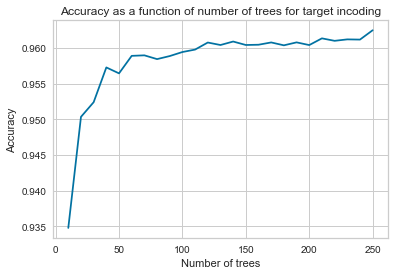

In [63]:
from tqdm import tqdm

#for item1 in tqdm(range(n_items)):
y = pd.DataFrame(TrainTrue_labe_df_target)
X = pd.DataFrame(df_target.values)

#Import Random Forest Classifier model
acc=[]
forest_size_log=[]
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
num_of_tress=np.arange(10, 260, 10).tolist()
for i in tqdm(num_of_tress):
    model = RandomForestClassifier(n_estimators=i, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
# Probabilities for each class
    rf_probs = model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, rf_probs)
    acc.append(roc_value)
    forest_size_log.append(i)
plt.plot(forest_size_log, acc)
plt.title('Accuracy as a function of number of trees for target incoding')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [07:41<00:00, 24.26s/it]


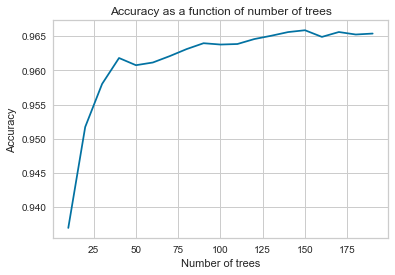

In [64]:
y = TrainTrue_label
X = df_Hot_incoding.values
#Import Random Forest Classifier model
acc=[]
forest_size_log=[]
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
num_of_tress=np.arange(10, 200, 10).tolist()
for i in tqdm(num_of_tress):
    model = RandomForestClassifier(n_estimators=i, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
# Probabilities for each class
    rf_probs = model.predict_proba(X_test)[:, 1]
    roc_value = roc_auc_score(y_test, rf_probs)
    acc.append(roc_value)
    forest_size_log.append(i)
plt.plot(forest_size_log, acc)
plt.title('Accuracy as a function of number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

### Random Forest  for Target Incoding(kfold)<a name="RF1" />

0it [00:00, ?it/s]

Target incoding ROC kfold Forest:


10it [04:34, 27.48s/it]

[832 195]
[156 871]
The new scaled error based auc is: 0.6359223300970874


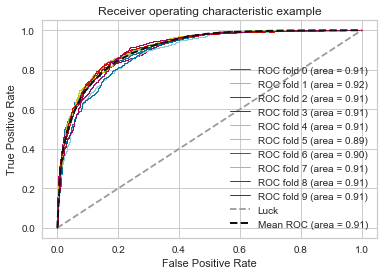

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1028
           1       0.81      0.85      0.83      1027

    accuracy                           0.82      2055
   macro avg       0.82      0.82      0.82      2055
weighted avg       0.82      0.82      0.82      2055

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1028
           1       0.81      0.86      0.83      1027

    accuracy                           0.83      2055
   macro avg       0.83      0.83      0.83      2055
weighted avg       0.83      0.83      0.83      2055

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1028
           1       0.82      0.86      0.84      1026

    accuracy                           0.83      2054
   macro avg       0.83      0.83      0.83      2054
weighted avg       0.83      0.83      0.83      2054

              preci

In [65]:
# {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
print("Target incoding ROC kfold Forest:")    
y = TrainTrue_labe_df_target.to_numpy()
X = df_target.values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
clf = KFoldROC(x_train,y_train,RandomForestClassifier(criterion='entropy',n_estimators=300, min_samples_split = 2,min_samples_leaf=1,max_features = 'auto',max_depth=10))
print("Validation:")
print(clf.score(df_target_x_val, df_target_y_val))
##df_target_x_val,df_target_y_val,df_Hot_incoding_x_val,df_Hot_incoding_y_val

### Random Forest for Hot Incoding<a name="RF2" />

10it [08:58, 53.85s/it]

[855 170]
[160 869]
The new scaled error based auc is: 0.6399406087602079


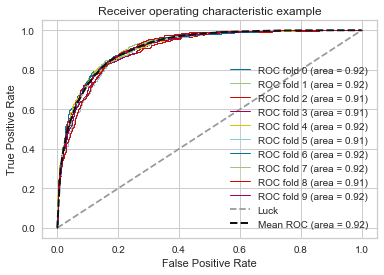

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1025
           1       0.84      0.84      0.84      1030

    accuracy                           0.84      2055
   macro avg       0.84      0.84      0.84      2055
weighted avg       0.84      0.84      0.84      2055

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1026
           1       0.85      0.84      0.84      1029

    accuracy                           0.84      2055
   macro avg       0.84      0.84      0.84      2055
weighted avg       0.84      0.84      0.84      2055

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1025
           1       0.83      0.84      0.84      1029

    accuracy                           0.83      2054
   macro avg       0.83      0.83      0.83      2054
weighted avg       0.83      0.83      0.83      2054

              preci

In [66]:
#{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 300} print("Hot incoding ROC kfold Forest:")    
y = TrainTrue_label.to_numpy()
X = df_Hot_incoding.values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
clf2 = KFoldROC(x_train,y_train,RandomForestClassifier(criterion='entropy',n_estimators=300, min_samples_split = 5,min_samples_leaf=8,max_features = 'sqrt',max_depth=10))
print("Validation:")
print(clf2.score(df_Hot_incoding_x_val, df_Hot_incoding_y_val))
##df_target_x_val,df_target_y_val,df_Hot_incoding_x_val,df_Hot_incoding_y_val

## ANN - Artificial neural network<a name="ANN" />

Target incoding ROC kfold ANN:


10it [01:08,  6.81s/it]

[813 217]
[178 846]
The new scaled error based auc is: 0.5997830802603037


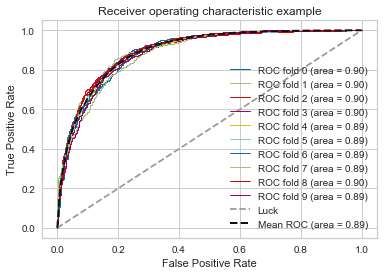

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1030
           1       0.81      0.84      0.83      1025

    accuracy                           0.82      2055
   macro avg       0.82      0.82      0.82      2055
weighted avg       0.82      0.82      0.82      2055

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1031
           1       0.82      0.84      0.83      1024

    accuracy                           0.83      2055
   macro avg       0.83      0.83      0.83      2055
weighted avg       0.83      0.83      0.83      2055

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1030
           1       0.81      0.84      0.82      1024

    accuracy                           0.82      2054
   macro avg       0.82      0.82      0.82      2054
weighted avg       0.82      0.82      0.82      2054

              preci

In [67]:
'''target incoding 0.8927915273170535 {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_iter': 500, 'random_state': 3, 'solver': 'lbfgs'}

One Hot decoding 0.9340108299049915 {'activation': 'relu', 'alpha': 1e-08, 'hidden_layer_sizes': 10, 'max_iter': 500, 'random_state': 2, 'solver': 'lbfgs'}

0.8353886468131982 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 10, 20), 'max_iter': 500, 'random_state': 2, 'solver': 'lbfgs'}'''
print("Target incoding ROC kfold ANN:")    
y = TrainTrue_labe_df_target.to_numpy()
X = df_target.values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
clf3 = KFoldROC(x_train,y_train,MLPClassifier(hidden_layer_sizes=10,alpha=0.1, activation='tanh', solver='lbfgs', max_iter=500,random_state=3))
print("Validation:")
print(clf3.score(df_target_x_val, df_target_y_val))

0it [00:00, ?it/s]

hot incoding ROC kfold ANN:


10it [01:11,  7.15s/it]

[812 212]
[156 874]
The new scaled error based auc is: 0.6295743091859597


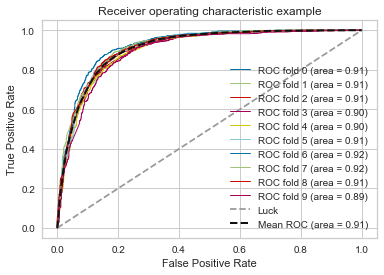

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1025
           1       0.83      0.86      0.85      1030

    accuracy                           0.84      2055
   macro avg       0.84      0.84      0.84      2055
weighted avg       0.84      0.84      0.84      2055

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1025
           1       0.82      0.87      0.84      1030

    accuracy                           0.84      2055
   macro avg       0.84      0.84      0.84      2055
weighted avg       0.84      0.84      0.84      2055

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1025
           1       0.83      0.85      0.84      1029

    accuracy                           0.84      2054
   macro avg       0.84      0.84      0.84      2054
weighted avg       0.84      0.84      0.84      2054

              preci

In [68]:
print("hot incoding ROC kfold ANN:")    
y = TrainTrue_label.to_numpy()
X = df_Hot_incoding.values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
clf4 = KFoldROC(x_train,y_train,MLPClassifier(hidden_layer_sizes=10,alpha=1e-08, activation='relu', solver='lbfgs', max_iter=500,random_state=2))
print("Validation:")
print(clf4.score(df_Hot_incoding_x_val, df_Hot_incoding_y_val))

## Logistic regession (Kfold)<a name="LR" />

0it [00:00, ?it/s]

Target incoding ROC kfold Logistic Regression:


10it [00:02,  4.98it/s]


[814 206]
[235 799]
The new scaled error based auc is: 0.5387441549766199


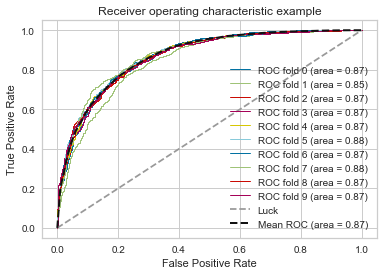

0it [00:00, ?it/s]

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1020
           1       0.78      0.78      0.78      1035

    accuracy                           0.78      2055
   macro avg       0.78      0.78      0.78      2055
weighted avg       0.78      0.78      0.78      2055

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1021
           1       0.76      0.79      0.78      1034

    accuracy                           0.77      2055
   macro avg       0.77      0.77      0.77      2055
weighted avg       0.77      0.77      0.77      2055

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1020
           1       0.79      0.79      0.79      1034

    accuracy                           0.79      2054
   macro avg       0.79      0.79      0.79      2054
weighted avg       0.79      0.79      0.79      2054

              preci

10it [00:05,  1.70it/s]

[824 203]
[183 844]
The new scaled error based auc is: 0.5987078248384781


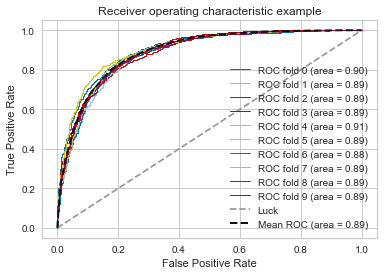

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1028
           1       0.82      0.81      0.81      1027

    accuracy                           0.82      2055
   macro avg       0.82      0.82      0.82      2055
weighted avg       0.82      0.82      0.82      2055

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1028
           1       0.80      0.81      0.81      1027

    accuracy                           0.80      2055
   macro avg       0.80      0.80      0.80      2055
weighted avg       0.80      0.80      0.80      2055

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1028
           1       0.79      0.82      0.80      1026

    accuracy                           0.80      2054
   macro avg       0.80      0.80      0.80      2054
weighted avg       0.80      0.80      0.80      2054

              preci

In [69]:

print("Target incoding ROC kfold Logistic Regression:")    
y = TrainTrue_labe_df_target.to_numpy()
X = df_target.values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
clf5 = KFoldROC(x_train,y_train,LogisticRegression(penalty="l1",C=0.615848211066026, solver='liblinear',max_iter=1000) )
print("Validation:")
print(clf5.score(df_target_x_val, df_target_y_val))
print("-------------------------------------")
print("Hot incoding ROC kfold Logistic Regression:")    
y = TrainTrue_label.to_numpy()
X = df_Hot_incoding.values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
clf6 = KFoldROC(x_train,y_train,LogisticRegression(penalty="l1",C=0.615848211066026, solver='liblinear',max_iter=1600) )
print("Validation:")
print(clf6.score(df_Hot_incoding_x_val, df_Hot_incoding_y_val))

## Final Choice and creating CSV<a name="Final" />


  1. [Random Forest](#Final1)
  2. [Conclusion](#Final2)

In [70]:
TargetIncodingFlag=False
if (TargetIncodingFlag==True):
    df_train_X = df_target.values
    df_train_y = TrainTrue_labe_df_target.to_numpy()
    df_val_x = df_target_x_val
    df_val_y = df_target_y_val
    Submit_data_x = TargetIncoding_test_without_target
else:
    df_train_X = df_Hot_incoding.values
    df_train_y = TrainTrue_label.to_numpy()
    df_val_x = df_Hot_incoding_x_val
    df_val_y = df_Hot_incoding_y_val
    Submit_data_x = HotIncoding_test_without_target
    


### Random Forest for One-Hot Incoding <a name="Final1" />

Confusion matrix, without normalization
[[1358  284]
 [ 100  289]]
Normalized confusion matrix
[[0.82704019 0.17295981]
 [0.25706941 0.74293059]]


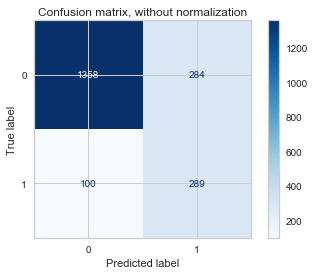

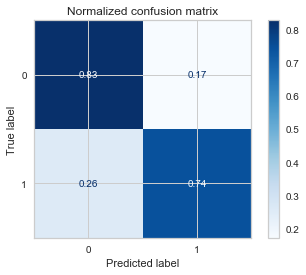

In [71]:
#X_train, X_test, y_train, y_test = train_test_split(df_train_X,df_train_y, random_state=0)#new
X_train,y_train = df_train_X,df_train_y
#{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_iter': 500, 'random_state': 3, 'solver': 'lbfgs'}
Chosen_Class = RandomForestClassifier(criterion='entropy',n_estimators=300, min_samples_split = 5,min_samples_leaf=8,max_features = 'sqrt',max_depth=10)
#MLPClassifier(hidden_layer_sizes=10,alpha=1e-08, activation='relu', solver='lbfgs', max_iter=500,random_state=2)
Chosen_Class.fit(X_train, y_train)

titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]

#df_target_x_val, df_target_y_val
for title, normalize in titles_options:
    disp = plot_confusion_matrix(Chosen_Class, df_val_x, df_val_y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [72]:
from sklearn import metrics
from sklearn.metrics import recall_score

y = df_val_y
pred = Chosen_Class.predict(df_val_x)
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
print(metrics.auc(fpr, tpr))

0.7849853930719639


## Validtion set

In [73]:

print(y)
print(pred)
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
print(metrics.auc(fpr, tpr))

#print(recall_score(y, pred))

2001     1
19434    0
115      0
16409    1
18465    1
        ..
12391    0
12906    0
14601    0
14537    1
6232     0
Name: label, Length: 2031, dtype: int64
[0 1 0 ... 1 1 0]
0.7849853930719639


### New scale

In [74]:
CM = disp.confusion_matrix
tn =1368  
tp = 292
fp = 97
fn = 274
NewScaleOfError = (tn+tp) / (tn+tp+fp+5*fn)
print("New scale: "+str(NewScaleOfError))

New scale: 0.5308602494403581


In [75]:
y_predict=Chosen_Class.predict(Submit_data_x)
unique_elements, counts_elements = np.unique(y_predict, return_counts=True)
print("Frequency of unique values of the said array:")
pd.DataFrame(np.asarray((unique_elements, counts_elements)).T)

Frequency of unique values of the said array:


0     1
0  0  5144
1  1  2243

### Conclusion<a name="Final2" />

In [76]:
y_predict_Prob=Chosen_Class.predict_proba(Submit_data_x)[:,1]

In [77]:
y_prob_df_results = pd.DataFrame(y_predict_Prob,columns=['pred_proba'])
y_prob_df_results.to_csv("SubmissionGroup.csv", index=True)

y_prob_df_results = pd.DataFrame(y_predict,columns=['label'])
y_prob_df_results.to_csv("SubmissionGroup2.csv", index=True)